# **Support Vector Regression (SVR) — Unified ML Pipeline**

## 1️⃣ Notebook Overview

This notebook demonstrates how to train, evaluate, analyze, and visualize  
**Support Vector Regression (SVR)** models using the **general-purpose  
`MLPipelineRunner`** architecture.

### 🔍 What this notebook covers

- Load and configure the unified ML pipeline  
- Train all SVR model variants (baseline, grid, random, hyperopt)  
- Evaluate performance using unified metrics  
- Perform model‑specific analysis (support vectors, complexity, etc.)  
- Generate visualizations (EDA, model plots, comparison plots)  
- Produce future forecasts with uncertainty bands  

This notebook is **model‑agnostic** — switching to Random Forest, XGBoost,  
or Linear Regression requires only changing one line of code.


## 2️⃣ Environment and project context

In this section we:

- Import core utilities and configuration
- Confirm project paths and environment
- Briefly restate the modeling objective for the Guayas region

We assume the project structure is already set up and that the feature engineering pipeline 
has produced a `final_train_dataset.csv` for week 3.

In [2]:
import os
import sys



os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# --- Setup ---
%load_ext autoreload
%autoreload 2
%matplotlib inline

bad_paths = [
    "/Users/guykaptue/my_work_spaces/machine learning",
    "/Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/src"
]
sys.path = [p for p in sys.path if os.path.abspath(p) not in bad_paths]

print(f"Clean {sys.path}")

Clean ['/opt/anaconda3/envs/retail_env/lib/python311.zip', '/opt/anaconda3/envs/retail_env/lib/python3.11', '/opt/anaconda3/envs/retail_env/lib/python3.11/lib-dynload', '', '/opt/anaconda3/envs/retail_env/lib/python3.11/site-packages']


In [3]:
import os
import sys
from IPython.display import display
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)

# ------------------------------------------------------------
# 1️⃣ Determine project root dynamically
# ------------------------------------------------------------
cwd = os.getcwd()
print("Current working directory:", cwd)

# Go up THREE levels to reach retail_demand_analysis
project_root = os.path.abspath(os.path.join(cwd, "../../.."))
print("Project root:", project_root)

# ------------------------------------------------------------
# 2️⃣ Add project root to sys.path
# ------------------------------------------------------------
# ------------------------------------------------------------
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)

# ------------------------------------------------------------
# 3️⃣ Verify src is importable
# ------------------------------------------------------------
src_path = os.path.join(project_root, "src")
print("Does src exist?", os.path.exists(src_path))

Current working directory: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/notebooks/week_3/ml
Project root: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis
Project root added to sys.path: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis
Does src exist? True


In [4]:
# Verify that src is importable
try:
    import src
    print("✅ src module found at:", src.__file__)
except ModuleNotFoundError:
    print("❌ src module not found. Check your sys.path!")


📌 Plot 7 — 120-Day Linear Trend
✅ src module found at: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/src/__init__.py


### *2.2 Environment and imports*

In [5]:
# ================================================================
# 📦 2.2. Import Libraries and Environment Setup
# This cell loads all required libraries and configures the notebook
# environment for professional forecasting workflows.
# ================================================================

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src import MLPipelineRunner, ModelType, ModelConfig



warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

print("✅ Environment initialized successfully")
print(f"Pandas: {pd.__version__}, NumPy: {np.__version__}")



✅ Environment initialized successfully
Pandas: 2.3.3, NumPy: 2.3.5


### *2.3 Configure the ML Pipeline*

We define the dataset, filtering mode, store/item selection, and verbosity.

The `ModelConfig` object controls:
- dataset filename  
- date filtering  
- store/item selection  
- folder structure  
- verbosity  


In [6]:
config = ModelConfig(
    week=3,
    filename="final_train_dataset.csv",
    max_date="2016-12-31",
    load_mode="csv_filter",
    filter_folder="filtered",
    folder_name="features",
    store_ids=[24],
    item_ids=[105577],
    verbose=True
)

display(config)


ModelConfig(week=3, filename='final_train_dataset.csv', max_date='2016-12-31', load_mode='csv_filter', filter_folder='filtered', folder_name='features', store_ids=[24], item_ids=[105577], verbose=True)

## 3️⃣ Initialize the Unified ML Pipeline for SVR

The `MLPipelineRunner` dynamically loads the correct model runner  
(`SVRRunner`) and prepares:

- Data loading  
- Preprocessing  
- Train/test split  
- Visualizer  
- Results manager  
- Directory structure  


In [8]:
runner = MLPipelineRunner(
    model_type=ModelType.SVR,
    config=config
)


🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖
INITIALIZING GENERAL MACHINE LEARNING PIPELINE
🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖
Debug: MODEL_DISPLAY_NAMES keys = [<ModelType.LINEAR_REGRESSION: 'linear_regression'>, <ModelType.RANDOM_FOREST: 'random_forest'>, <ModelType.XGBOOST: 'xgboost'>, <ModelType.SVR: 'svr'>]
📊 Selected Model: Support Vector Regression
🔄 Loading Support Vector Regression runner...
🔧 Initializing SVRRunner...
📂 Setting up paths for results, visualizations, and models...
📋 Loading ML configuration...
📊 Preparing data for modeling...
Initializing DataPreparer...
Max date set to: 2016-12-31 00:00:00
Loading data from DataLoader...
🔧 DataLoader initialized with empty cache.
📌 Using loader: load_filtered_csv()
⚡ Loading existing filtered dataset: final_train_dataset__MAXDATE-2016-12-31__STORE-24__ITEM-105577.csv
✅ Loaded filtered dataset with shape: (1460, 44)

📅 Date Range:
   Start: 2013-01-02
   End:   2016-12-31
   Days:  1460
Data loaded with shape: (1460, 44)
Data

## 4️⃣ Train All SVR Variants

This will train:

- Baseline SVR  
- GridSearchCV  
- RandomizedSearchCV  
- Hyperopt Bayesian optimization  

Each variant is automatically:

- evaluated  
- logged  
- saved  
- visualized  
- added to comparison tables  


In [9]:
all_metrics = runner.train_all_variants()
all_metrics



🎯 Training all variants of Support Vector Regression...

🚀 Training Support Vector Regression - baseline...
🚀 Training baseline Support Vector Regression...
   🛠️  Fitting the baseline model...
   ✓ Baseline model fitted.
   📈 Generating predictions for svr...
📊 svr → RMSE: 1.612, MAE: 1.137, R²: 0.013
✅ Results saved locally to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_3/svr/svr_results.json


2026/01/14 15:19:49 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/14 15:19:49 INFO mlflow.store.db.utils: Updating database tables
2026/01/14 15:19:49 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/14 15:19:49 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/14 15:19:49 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/14 15:19:49 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/14 15:19:49 INFO mlflow.tracking.fluent: Experiment with name 'SVR' does not exist. Creating a new experiment.
2026/01/14 15:19:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


📊 Metrics logged to MLflow under experiment 'SVR'.
💾 MLflow metrics also saved locally to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/mlflow/svr_mlflow.json
💾 Attempting to save model to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/week_models/week_3/svr/svr.pkl
✅ Model successfully saved.


2026/01/14 15:19:52 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/14 15:19:52 INFO mlflow.store.db.utils: Updating database tables
2026/01/14 15:19:52 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/14 15:19:52 INFO alembic.runtime.migration: Will assume non-transactional DDL.
Successfully registered model 'SVR_svr_Week3'.
Created version '1' of model 'SVR_svr_Week3'.


Debug: Type of y_true: <class 'pandas.core.series.Series'>
Debug: Type of y_pred_series: <class 'numpy.ndarray'>
Debug: Length of y_true: 292
Debug: Length of y_pred_series: 292
Debug: Converting y_pred_series to pandas Series
Debug: min_len: 292
Debug: Length of y_true after slicing: 292
Debug: Length of y_pred_series after slicing: 292
Debug: Metrics for svr calculated successfully
✅ Baseline training complete.
   RMSE: 1.612, MAE: 1.137, R²: 0.013
✅ Training complete for baseline!
   ✓ baseline     | RMSE: 1.612 | MAE: 1.137 | R²: 0.013

🚀 Training Support Vector Regression - grid...
🔍 Running GridSearchCV for Support Vector Regression...
   🔧 Setting up GridSearchCV with parameters: {'kernel': ['rbf', 'linear'], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5], 'gamma': ['scale', 'auto']}
   🛠️  Fitting GridSearchCV...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=scale, kernel=rbf;, score=-1.873 total time=   0.0s
[CV 2/5]

2026/01/14 15:21:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[CV 5/5] END C=100, epsilon=0.5, gamma=auto, kernel=linear;, score=-0.748 total time=   1.0s
   ✓ GridSearchCV fitted.
✅ GridSearch complete. Best params: {'C': 0.1, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
   Best score: 1.183
   📈 Generating predictions for svr_grid...
📊 svr_grid → RMSE: 1.565, MAE: 1.130, R²: 0.071
✅ Results saved locally to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_3/svr/svr_grid_results.json
📊 Metrics logged to MLflow under experiment 'SVR'.
💾 MLflow metrics also saved locally to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/mlflow/svr_grid_mlflow.json
💾 Attempting to save model to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/week_models/week_3/svr/svr_grid.pkl
✅ Model successfully saved.


Successfully registered model 'SVR_svr_grid_Week3'.
Created version '1' of model 'SVR_svr_grid_Week3'.


Debug: Type of y_true: <class 'pandas.core.series.Series'>
Debug: Type of y_pred_series: <class 'numpy.ndarray'>
Debug: Length of y_true: 292
Debug: Length of y_pred_series: 292
Debug: Converting y_pred_series to pandas Series
Debug: min_len: 292
Debug: Length of y_true after slicing: 292
Debug: Length of y_pred_series after slicing: 292
Debug: Metrics for svr calculated successfully
Debug: Type of y_true: <class 'pandas.core.series.Series'>
Debug: Type of y_pred_series: <class 'numpy.ndarray'>
Debug: Length of y_true: 292
Debug: Length of y_pred_series: 292
Debug: Converting y_pred_series to pandas Series
Debug: min_len: 292
Debug: Length of y_true after slicing: 292
Debug: Length of y_pred_series after slicing: 292
Debug: Metrics for svr_grid calculated successfully
✅ Training complete for grid!
   ✓ grid         | RMSE: 1.565 | MAE: 1.130 | R²: 0.071

🚀 Training Support Vector Regression - random...
🎲 Running RandomizedSearchCV for Support Vector Regression...
   🔧 Setting up Random

2026/01/14 15:21:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[CV 4/5] END C=3.4167643418329705, epsilon=0.411511304956109, gamma=auto, kernel=linear;, score=-1.292 total time=   0.0s
[CV 5/5] END C=3.4167643418329705, epsilon=0.411511304956109, gamma=auto, kernel=linear;, score=-0.741 total time=   0.1s
[CV 1/5] END C=0.05575453980775373, epsilon=0.47607677518095004, gamma=scale, kernel=linear;, score=-1.762 total time=   0.0s
[CV 2/5] END C=0.05575453980775373, epsilon=0.47607677518095004, gamma=scale, kernel=linear;, score=-1.496 total time=   0.0s
[CV 3/5] END C=0.05575453980775373, epsilon=0.47607677518095004, gamma=scale, kernel=linear;, score=-0.637 total time=   0.0s
[CV 4/5] END C=0.05575453980775373, epsilon=0.47607677518095004, gamma=scale, kernel=linear;, score=-1.286 total time=   0.0s
[CV 5/5] END C=0.05575453980775373, epsilon=0.47607677518095004, gamma=scale, kernel=linear;, score=-0.743 total time=   0.0s
   ✓ RandomizedSearchCV fitted.
✅ RandomSearch complete. Best params: {'C': np.float64(0.044145368764944806), 'epsilon': np.fl

Successfully registered model 'SVR_svr_random_Week3'.
Created version '1' of model 'SVR_svr_random_Week3'.
/opt/anaconda3/envs/retail_env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/envs/retail_env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/envs/retail_env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources

      Hyperopt trial → params={'C': 34.196556584920145, 'epsilon': 0.0727170849377322, 'gamma': 'auto', 'kernel': 'rbf'}, RMSE=1.4118
  1%|▏         | 1/80 [00:03<04:01,  3.06s/trial, best loss: 1.4117578115837202]

/opt/anaconda3/envs/retail_env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/envs/retail_env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/envs/retail_env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this pack

      Hyperopt trial → params={'C': 27.67585669313066, 'epsilon': 0.06699878587532576, 'gamma': 'scale', 'kernel': 'linear'}, RMSE=1.1949
      Hyperopt trial → params={'C': 2.95199092253544, 'epsilon': 0.0016753403766797674, 'gamma': 'scale', 'kernel': 'rbf'}, RMSE=1.2196
      Hyperopt trial → params={'C': 2.3409841142354413, 'epsilon': 0.004358174975964993, 'gamma': 'scale', 'kernel': 'linear'}, RMSE=1.1968
      Hyperopt trial → params={'C': 0.14137747227389502, 'epsilon': 0.001963254065660652, 'gamma': 'auto', 'kernel': 'rbf'}, RMSE=1.2600
      Hyperopt trial → params={'C': 0.5861844750197743, 'epsilon': 0.0030612447933035, 'gamma': 'auto', 'kernel': 'linear'}, RMSE=1.1971
      Hyperopt trial → params={'C': 0.02132387090449935, 'epsilon': 0.9794263344853804, 'gamma': 'auto', 'kernel': 'linear'}, RMSE=1.2088
      Hyperopt trial → params={'C': 9.795558917070506, 'epsilon': 0.30962867048454823, 'gamma': 'scale', 'kernel': 'rbf'}, RMSE=1.2553
      Hyperopt trial → params={'C': 0.0

2026/01/14 15:22:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


📊 Metrics logged to MLflow under experiment 'SVR'.
💾 MLflow metrics also saved locally to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/mlflow/svr_hyperopt_mlflow.json
💾 Attempting to save model to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/week_models/week_3/svr/svr_hyperopt.pkl
✅ Model successfully saved.
Debug: Type of y_true: <class 'pandas.core.series.Series'>
Debug: Type of y_pred_series: <class 'numpy.ndarray'>
Debug: Length of y_true: 292
Debug: Length of y_pred_series: 292
Debug: Converting y_pred_series to pandas Series
Debug: min_len: 292
Debug: Length of y_true after slicing: 292
Debug: Length of y_pred_series after slicing: 292
Debug: Metrics for svr calculated successfully
Debug: Type of y_true: <class 'pandas.core.series.Series'>
Debug: Type of y_pred_series: <class 'numpy.ndarray'>
Debug: Length of y_true: 292
Debug: Length of y_pred_series: 292
Deb

Successfully registered model 'SVR_svr_hyperopt_Week3'.
Created version '1' of model 'SVR_svr_hyperopt_Week3'.


{'baseline': {'rmse': 1.6121087875533227,
  'mae': 1.1374722546402714,
  'r2': 0.013475434583930745,
  'variant': 'svr',
  'evaluation_time': '2026-01-14T15:19:48.877230'},
 'grid': {'rmse': 1.5646037262215116,
  'mae': 1.1301058614113122,
  'r2': 0.07075991923417757,
  'variant': 'svr_grid',
  'evaluation_time': '2026-01-14T15:21:21.928758',
  'best_params': {'C': 0.1,
   'epsilon': 0.5,
   'gamma': 'scale',
   'kernel': 'linear'}},
 'random': {'rmse': 1.5505451746987509,
  'mae': 1.1387140342992608,
  'r2': 0.0873840367650438,
  'variant': 'svr_random',
  'evaluation_time': '2026-01-14T15:21:56.086849',
  'best_params': {'C': np.float64(0.044145368764944806),
   'epsilon': np.float64(0.615308560162531),
   'gamma': 'scale',
   'kernel': 'linear'}},
 'hyperopt': {'rmse': 1.5671351300504854,
  'mae': 1.1277614016269095,
  'r2': 0.06775061437170848,
  'variant': 'svr_hyperopt',
  'evaluation_time': '2026-01-14T15:22:22.854372',
  'best_params': {'C': 0.6374533919372316,
   'epsilon': 0.

## 5️⃣ Evaluate the Best SVR Model

If no variant is specified, the pipeline automatically selects  
**the best model by RMSE**.


In [16]:
evaluation = runner.evaluate_all()
evaluation


   📋 No variants specified. Evaluating all trained variants: ['svr', 'svr_grid', 'svr_hyperopt', 'svr_random']
   📋 Filtered variants to evaluate: ['svr', 'svr_grid', 'svr_hyperopt', 'svr_random']

📊 Evaluating all variants of Support Vector Regression...

   🔄 Evaluating variant: svr

📊 Evaluating Support Vector Regression...
   📋 Using runner's X_test for evaluation.
   📋 Using runner's y_test for evaluation.
   🎯 Using specified variant: svr
   📌 X_test shape: (292, 14), y_test shape: (292,)
   🔮 Generating predictions for variant: svr
   📊 Calculating metrics...
✅ Evaluation complete for variant: svr!
   RMSE: 1.612, MAE: 1.137, R²: 0.013
   ✅ svr             | RMSE: 1.612 | MAE: 1.137 | R²: 0.013

   🔄 Evaluating variant: svr_grid

📊 Evaluating Support Vector Regression...
   📋 Using runner's X_test for evaluation.
   📋 Using runner's y_test for evaluation.
   🎯 Using specified variant: svr_grid
   📌 X_test shape: (292, 14), y_test shape: (292,)
   🔮 Generating predictions for var

{'svr': {'rmse': 1.6121087875533227,
  'mae': 1.1374722546402714,
  'r2': 0.013475434583930745,
  'mean_residual': 0.5175223489862723,
  'std_residual': 1.5267826830319942,
  'mape': 271836668539.53198,
  'model_type': 'svr',
  'variant': 'svr',
  'evaluation_time': '2026-01-14T15:47:00.403048'},
 'svr_grid': {'rmse': 1.5646037262215116,
  'mae': 1.1301058614113122,
  'r2': 0.07075991923417757,
  'mean_residual': 0.3491560045157122,
  'std_residual': 1.5251475025770005,
  'mape': 343468005957.7996,
  'model_type': 'svr',
  'variant': 'svr_grid',
  'evaluation_time': '2026-01-14T15:47:00.405393'},
 'svr_hyperopt': {'rmse': 1.5671351300504854,
  'mae': 1.1277614016269095,
  'r2': 0.06775061437170848,
  'mean_residual': 0.3516251886089672,
  'std_residual': 1.527177868676095,
  'mape': 334434859808.7515,
  'model_type': 'svr',
  'variant': 'svr_hyperopt',
  'evaluation_time': '2026-01-14T15:47:00.407550'},
 'svr_random': {'rmse': 1.5505451746987509,
  'mae': 1.1387140342992608,
  'r2': 0.

## 6️⃣ Model Analysis

This includes:

- Support vector statistics  
- Model complexity  
- Feature importance (if applicable)  
- Coefficient statistics (for linear models)  


In [17]:
analysis = runner.analyze_models() 
analysis

   📋 No variants specified. Analyzing all trained variants: ['svr', 'svr_grid', 'svr_hyperopt', 'svr_random']

🔍 Analyzing all variants of Support Vector Regression...

   🔄 Analyzing variant: svr

🔍 Analyzing Support Vector Regression...
   🎯 Using specified variant: svr
   📋 Constructed metrics key: svr_svr
   ⚠️ No metrics found for variant: svr
   🔧 Performing model-specific analysis for variant: svr

📊 Support Vectors Info for svr:
  n_support_vectors        : 667
  n_samples                : 1167
  support_ratio            : 0.5715509854327335
  dual_coef_mean           : 5.3264073145434795e-18
  dual_coef_std            : 0.9193629024418092
  dual_coef_min            : -1.0
  dual_coef_max            : 1.0

📊 Model Complexity for svr:
  kernel              : rbf
  C                   : 1.0
  epsilon             : 0.1
  gamma               : scale
  coef0               : 0.0
  shrinking           : True
  tol                 : 0.001
  max_iter            : -1
   💾 Saving analysis

{'svr': {'model_type': 'svr',
  'variant': 'svr',
  'analysis_time': '2026-01-14T15:52:41.003121',
  'support_vectors': {'n_support_vectors': 667,
   'n_samples': 1167,
   'support_ratio': 0.5715509854327335,
   'support_vectors_indices': [2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    26,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    84,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    94,
    95,
    96,
    97,
    98,
    99,
    100,
   

## 7️⃣ Generate All Visualizations

This includes:

- EDA plots  
- Single‑model analysis  
- Multi‑model comparison  
- Error distributions  
- Time‑series overlays  
- Radar performance charts  


### *7.1 Single Model analysis*


🎨 Generating visualizations for Support Vector Regression...
   📈 Generating model analysis plots...

📊 Generating analysis plots for Baseline...
   📈 Actual vs Predicted...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/05_actual_vs_predicted_svr.png


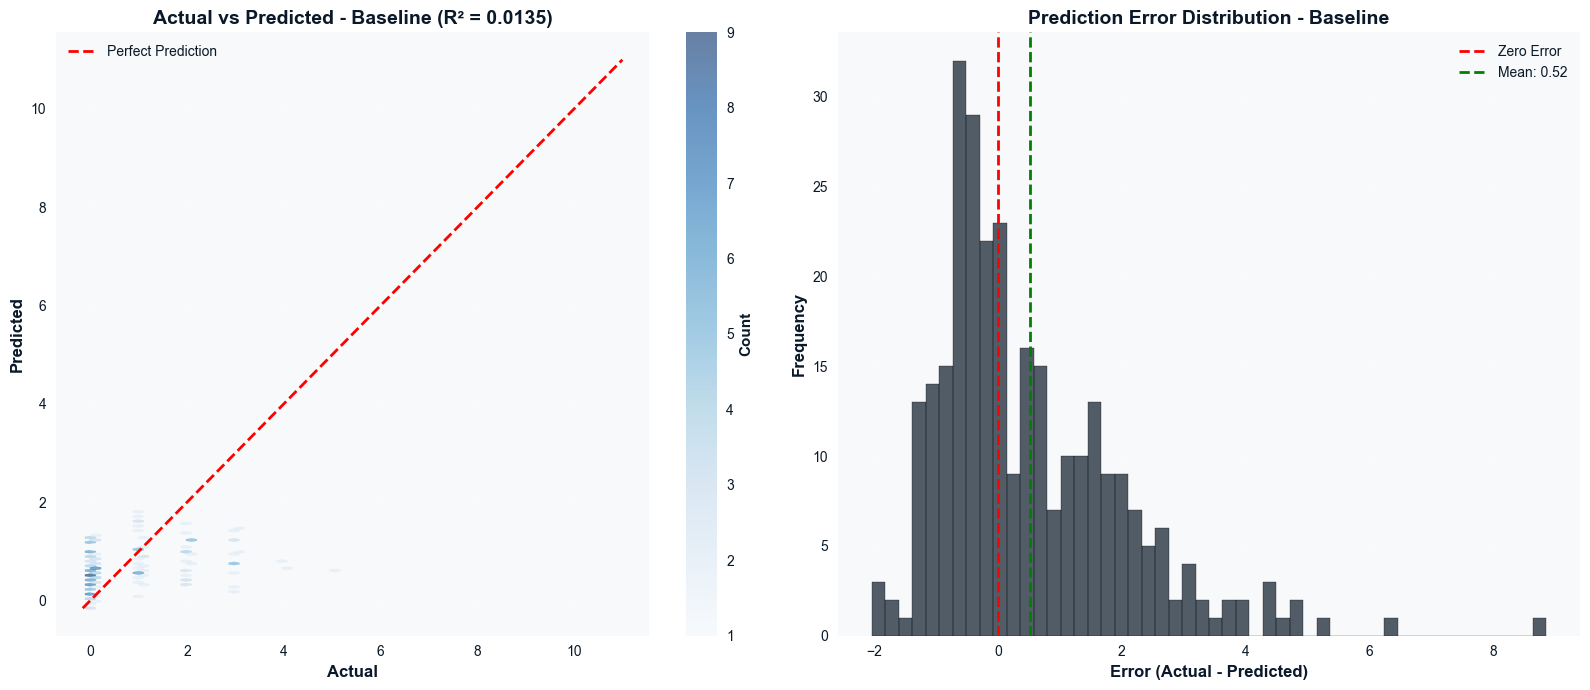

   📊 Residuals analysis...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/06_residuals_analysis_svr.png


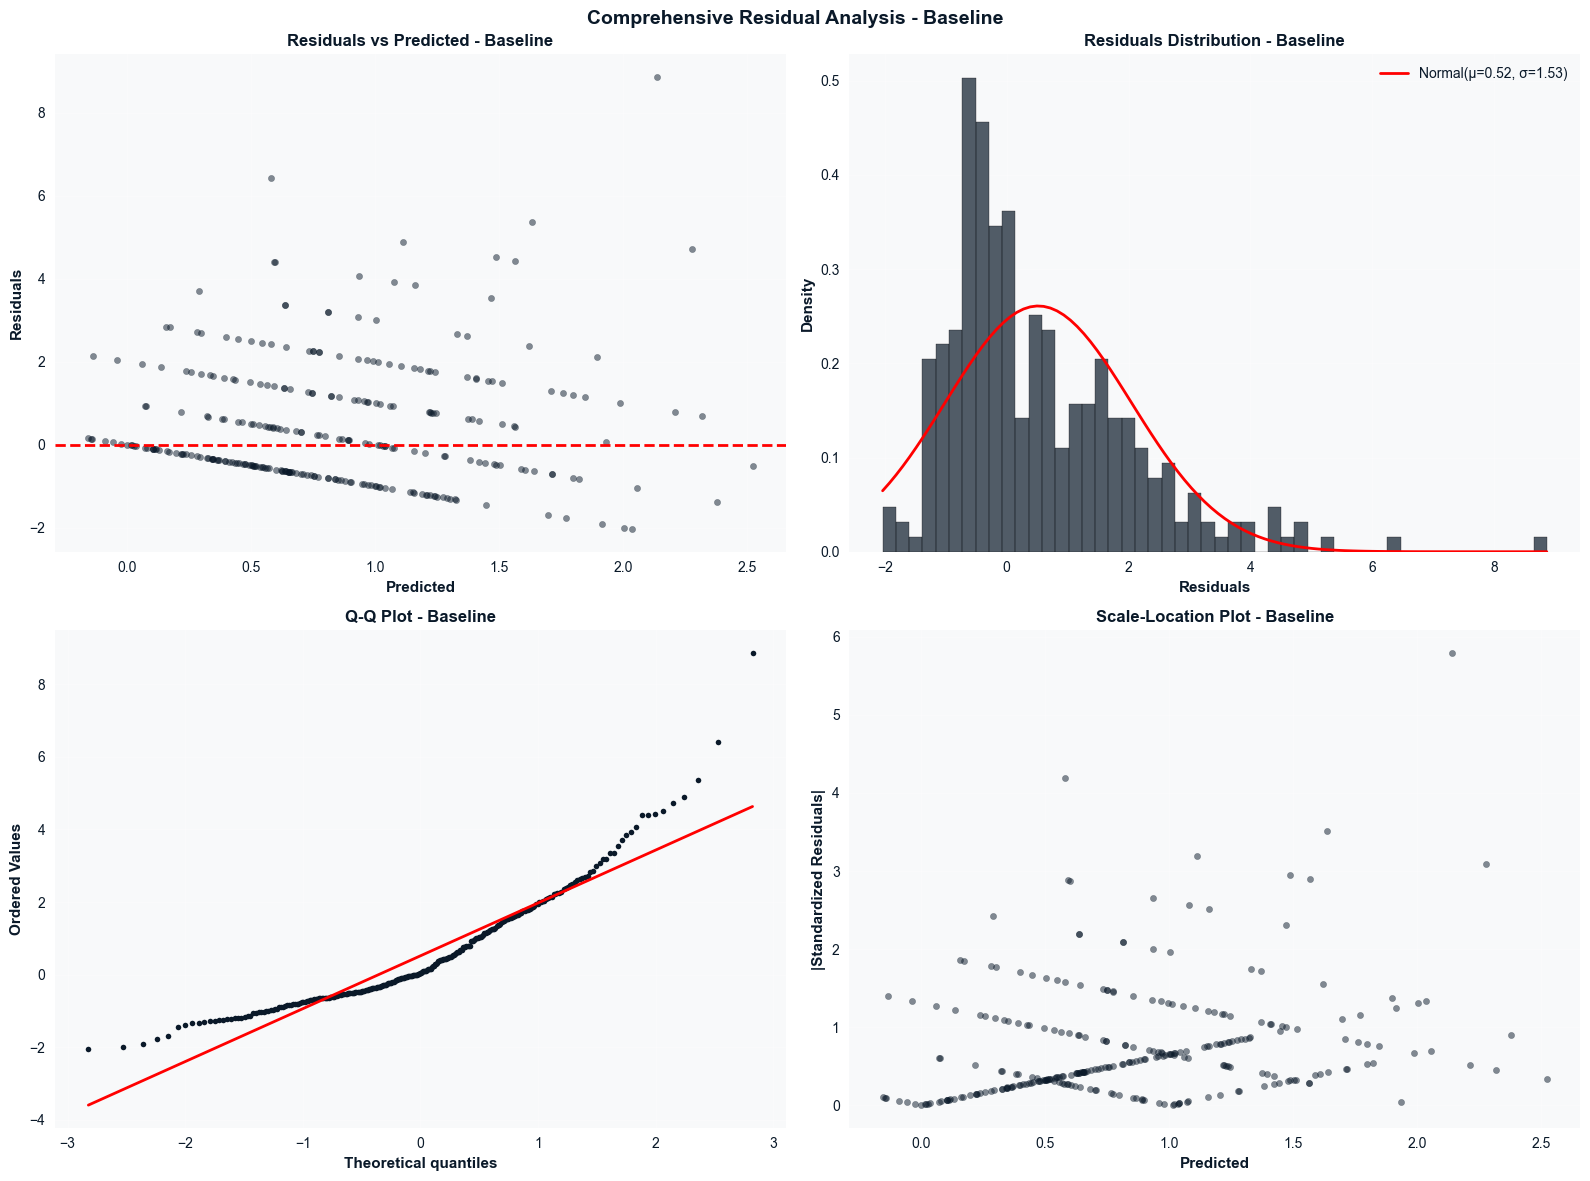


📊 Generating analysis plots for Grid Search...
   📈 Actual vs Predicted...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/05_actual_vs_predicted_svr_grid.png


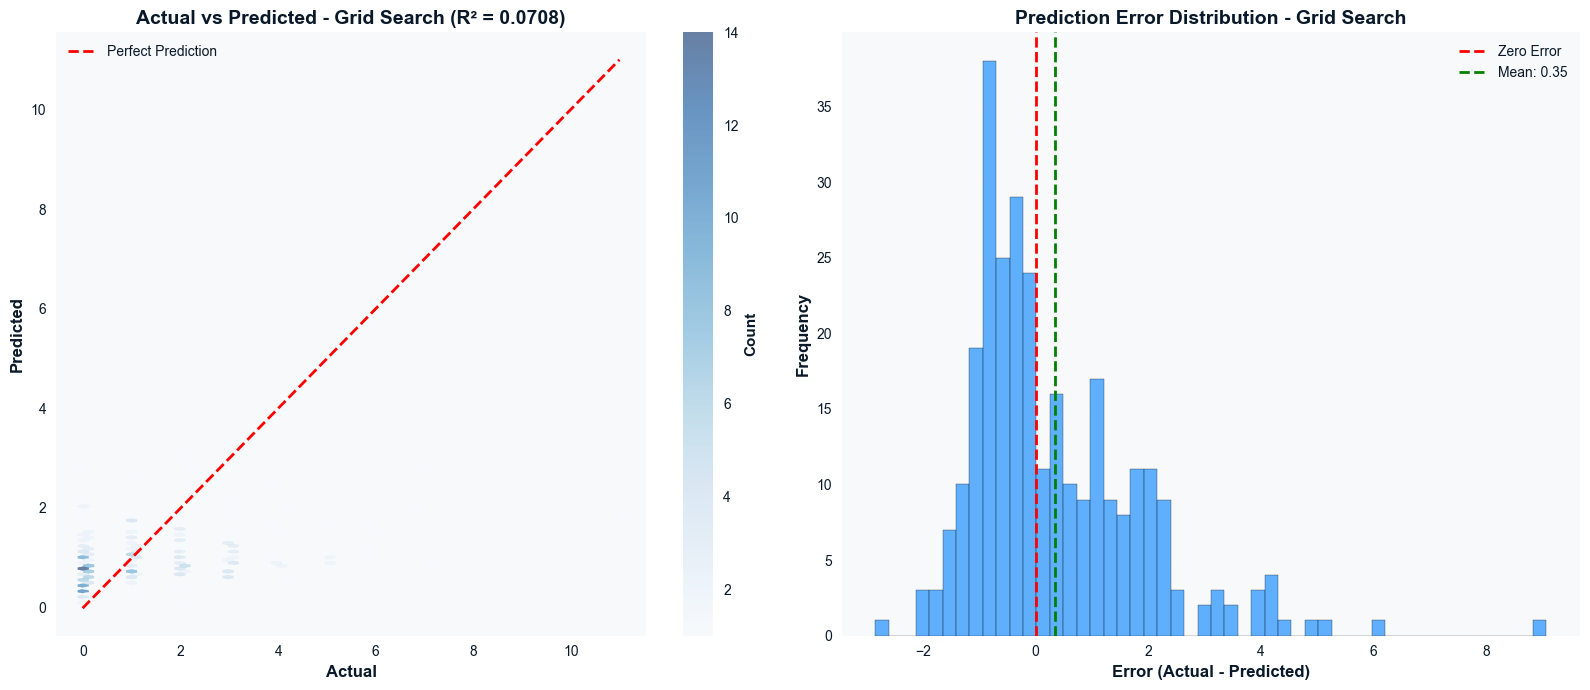

   📊 Residuals analysis...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/06_residuals_analysis_svr_grid.png


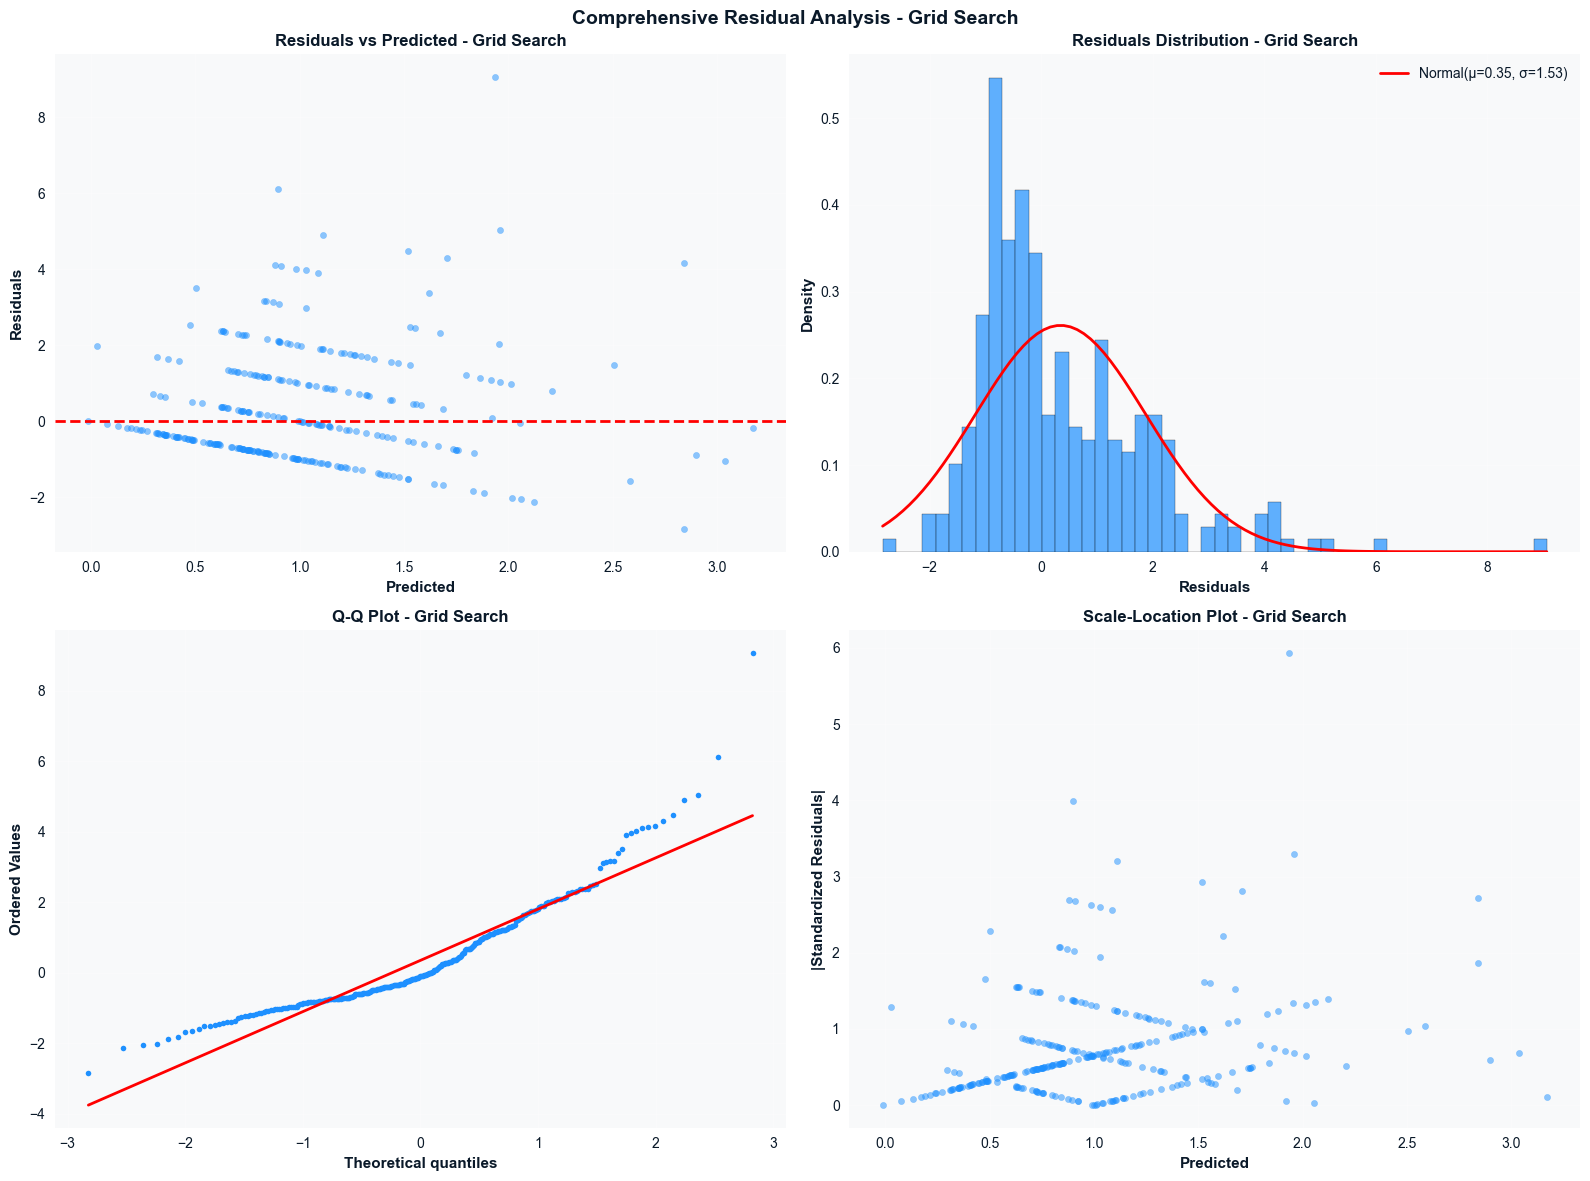


📊 Generating analysis plots for Hyperopt...
   📈 Actual vs Predicted...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/05_actual_vs_predicted_svr_hyperopt.png


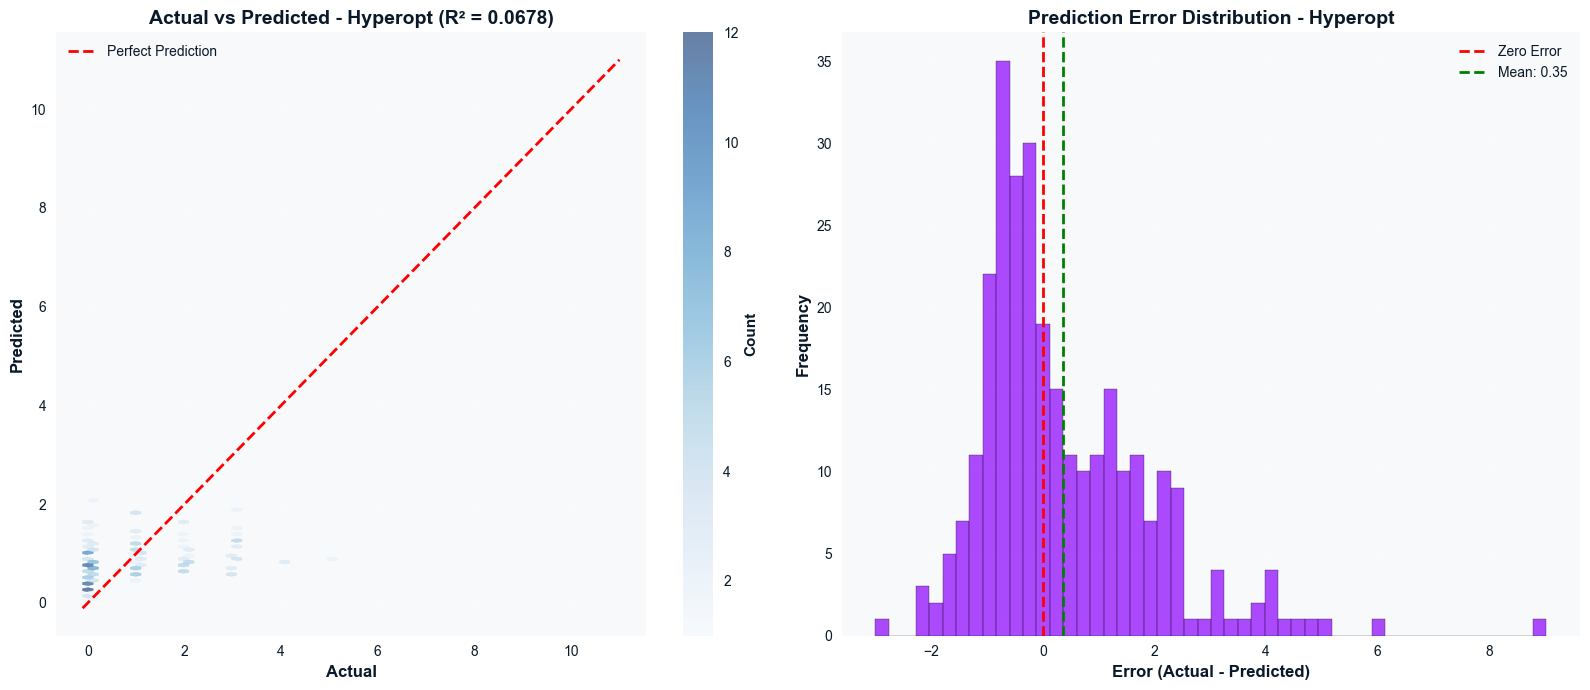

   📊 Residuals analysis...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/06_residuals_analysis_svr_hyperopt.png


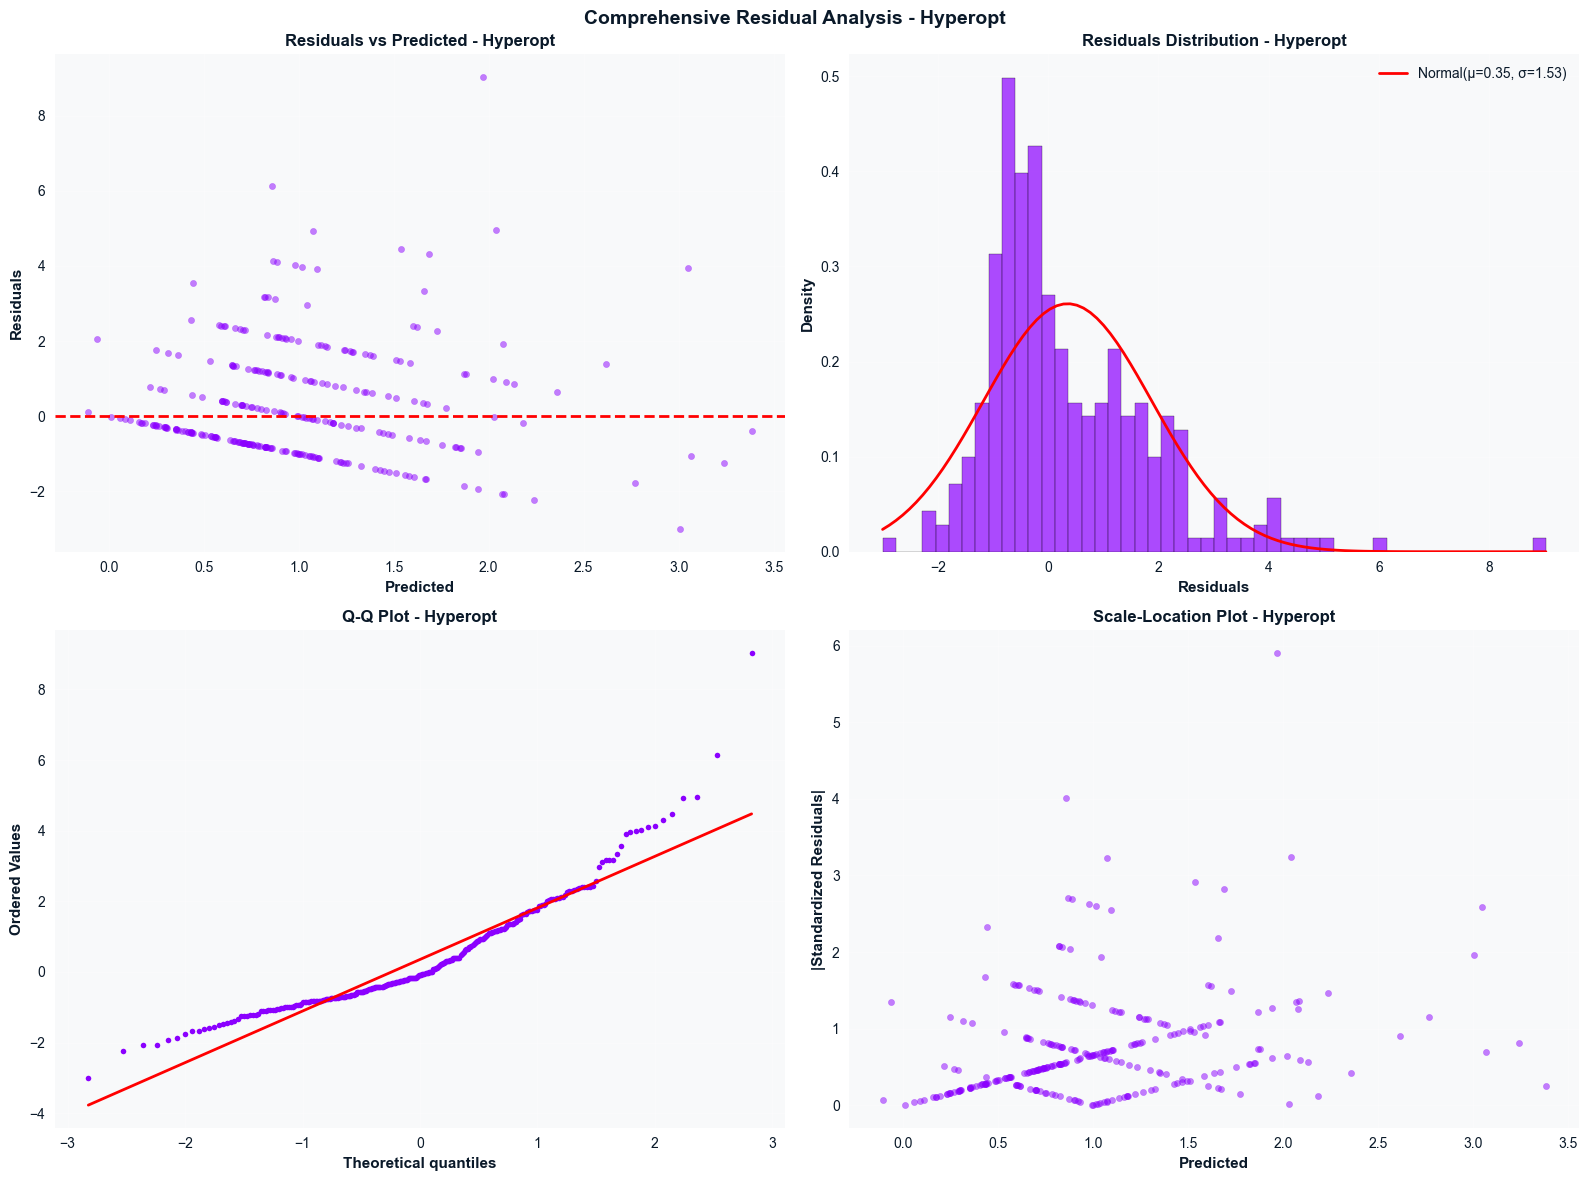


📊 Generating analysis plots for Random Search...
   📈 Actual vs Predicted...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/05_actual_vs_predicted_svr_random.png


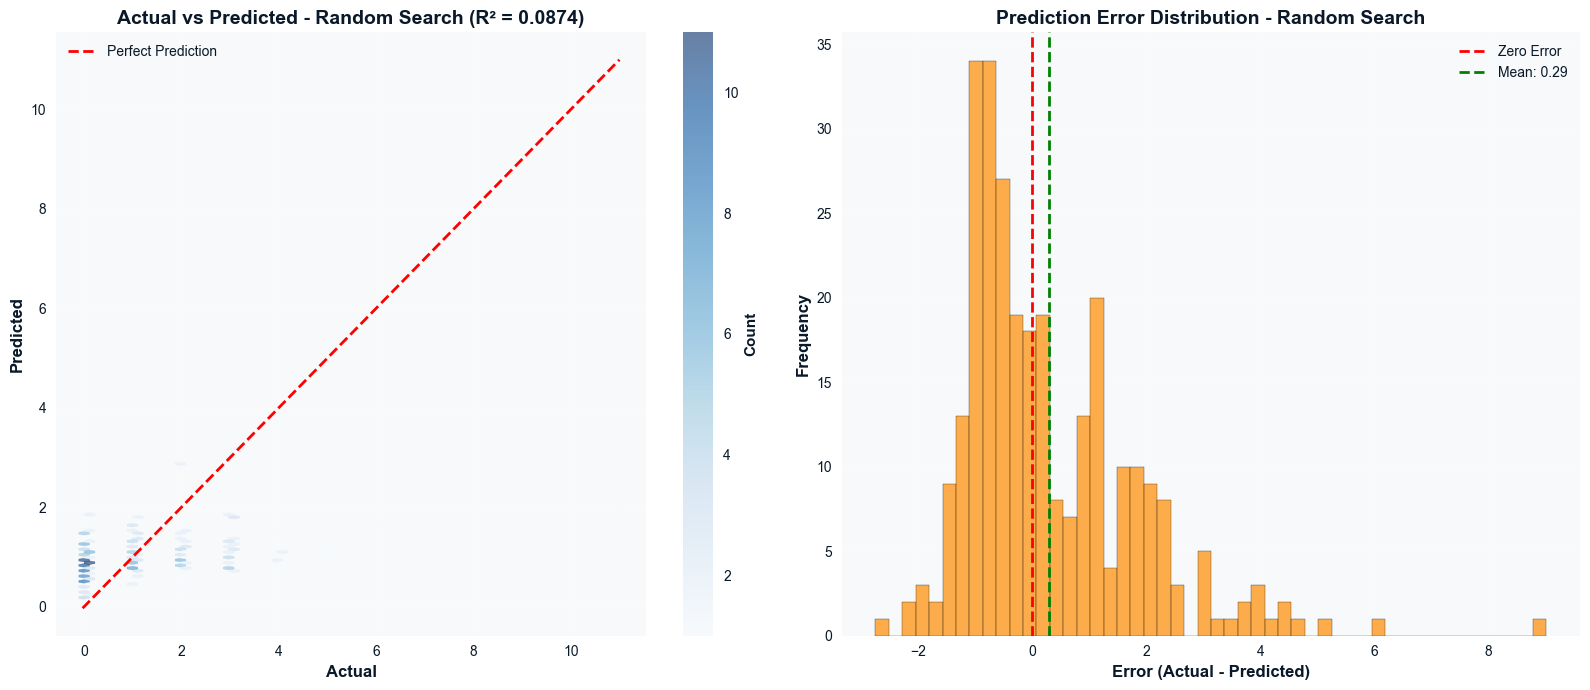

   📊 Residuals analysis...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/06_residuals_analysis_svr_random.png


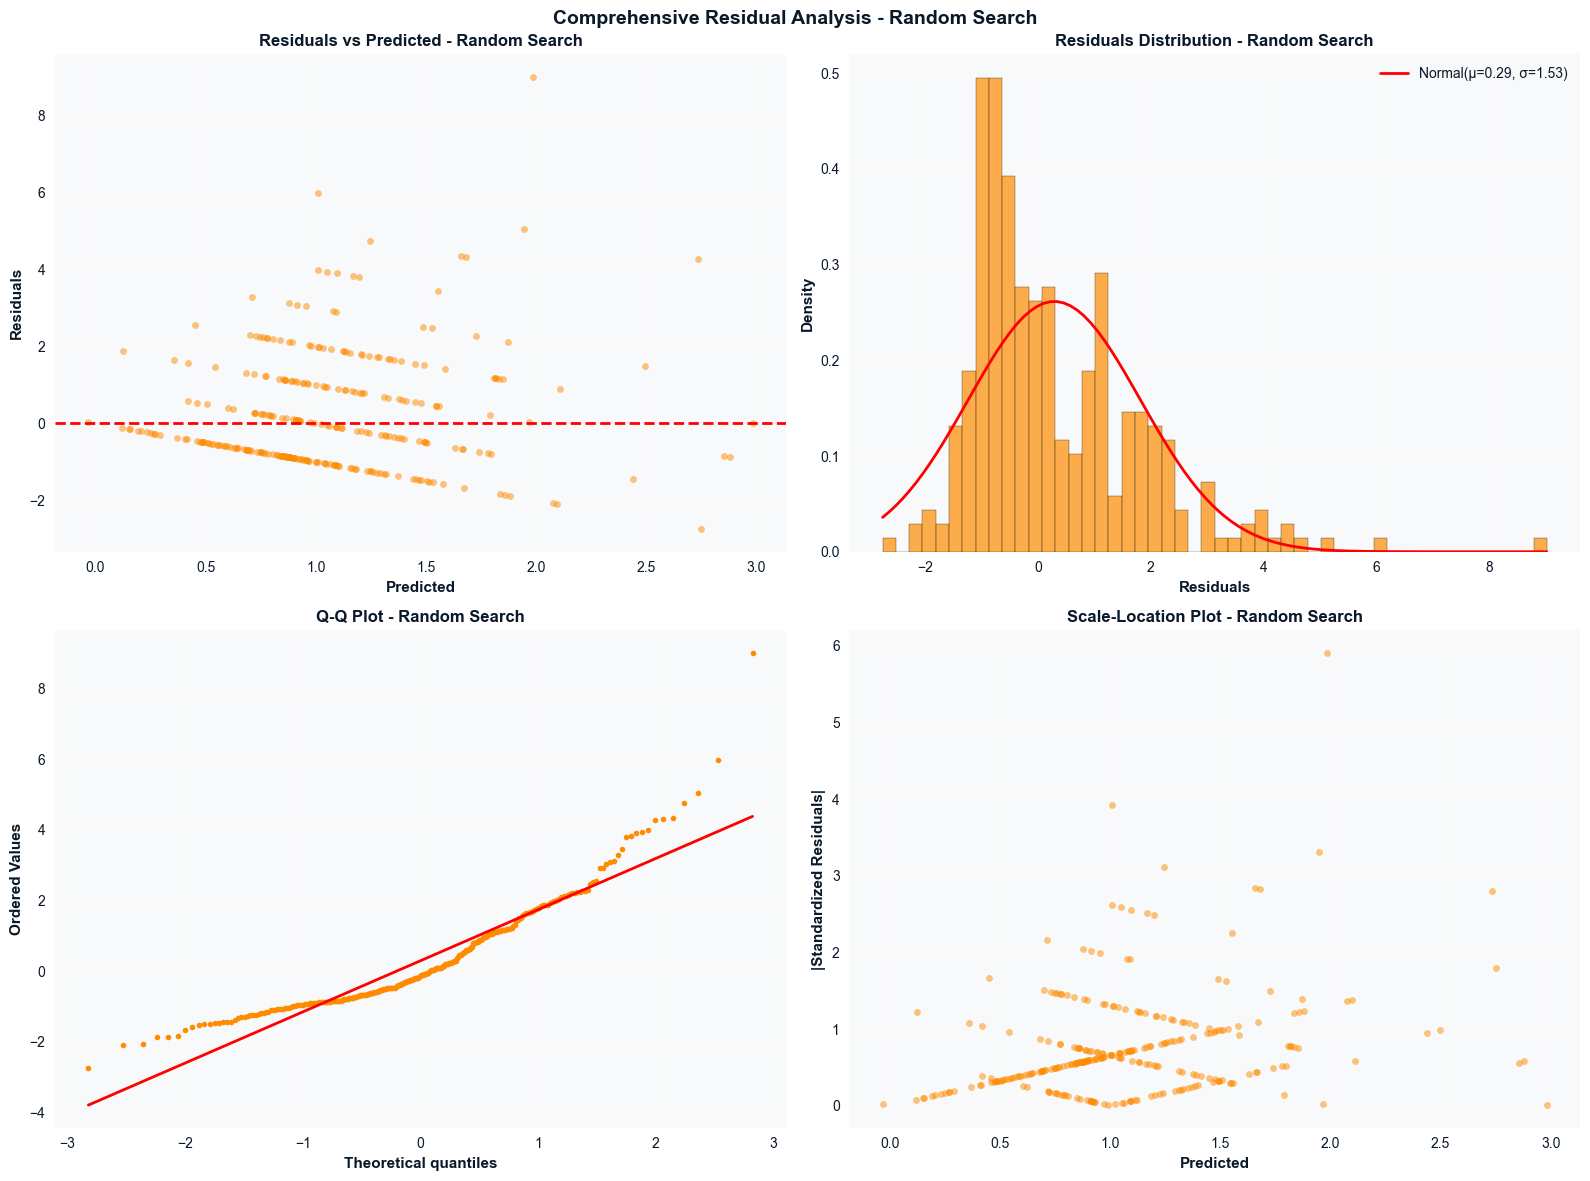


📊 Support Vectors Analysis for svr:
   Total samples: 1167
   Support vectors: 667
   Support vector ratio: 57.16%
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/support_vectors_svr.png


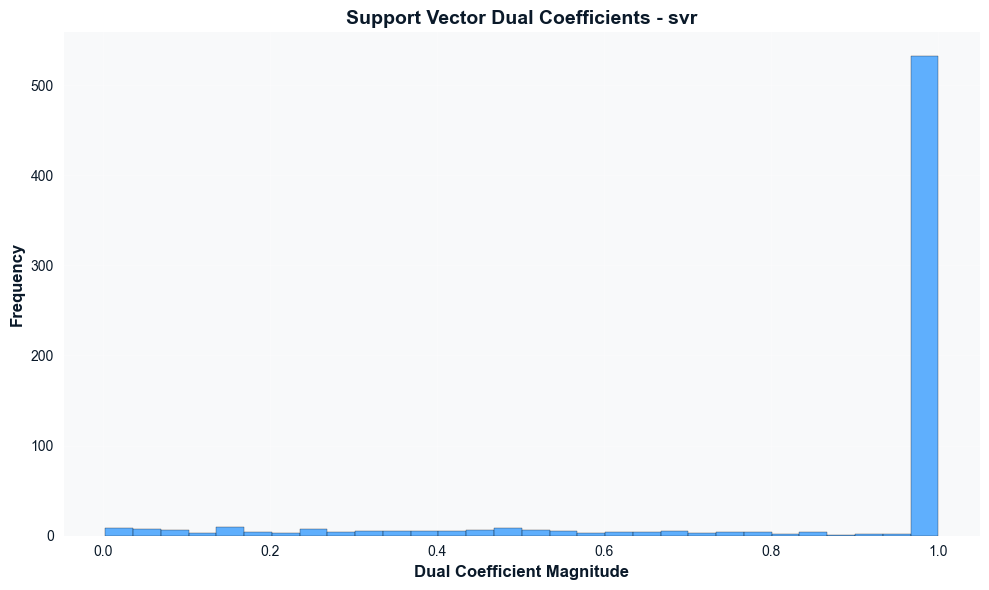

✅ Support vectors analysis plot saved: support_vectors_svr.png

📊 Support Vectors Analysis for svr_grid:
   Total samples: 1167
   Support vectors: 443
   Support vector ratio: 37.96%
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/support_vectors_svr_grid.png


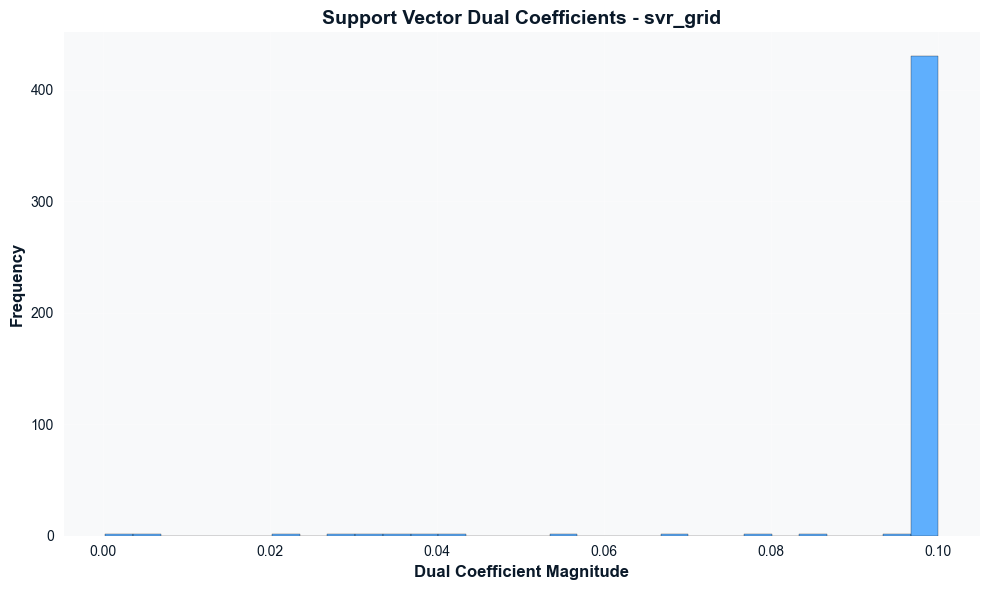

✅ Support vectors analysis plot saved: support_vectors_svr_grid.png

📊 Support Vectors Analysis for svr_hyperopt:
   Total samples: 1167
   Support vectors: 461
   Support vector ratio: 39.50%
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/support_vectors_svr_hyperopt.png


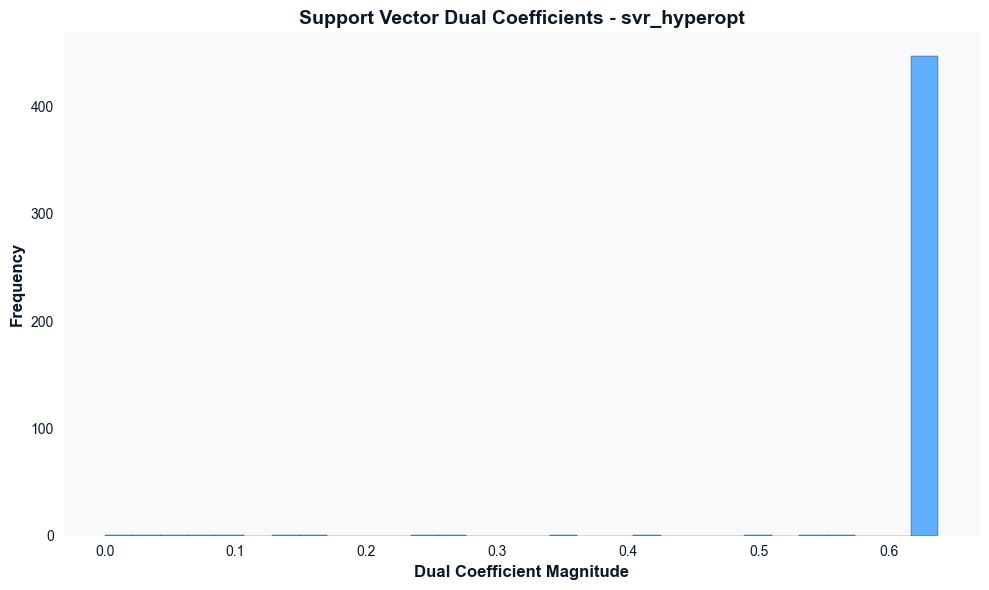

✅ Support vectors analysis plot saved: support_vectors_svr_hyperopt.png

📊 Support Vectors Analysis for svr_random:
   Total samples: 1167
   Support vectors: 407
   Support vector ratio: 34.88%
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/support_vectors_svr_random.png


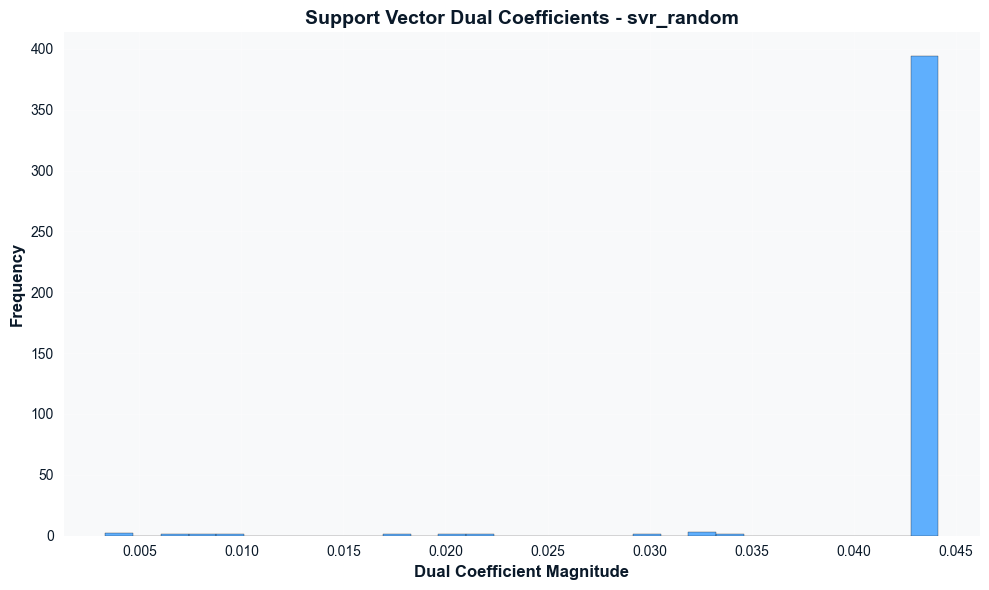

✅ Support vectors analysis plot saved: support_vectors_svr_random.png
✅ All visualizations generated!


In [18]:
runner.generate_visualizations(
    include_eda=False,
    include_model=True,
    include_comparison=False
)


### *7.2 Model Comparison*


🎨 Generating visualizations for Support Vector Regression...
   📊 Generating comparison plots...

GENERATING SVR MODEL COMPARISON PLOTS
📊 Generating multi-model comparison...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/07_multi_model_comparison.png


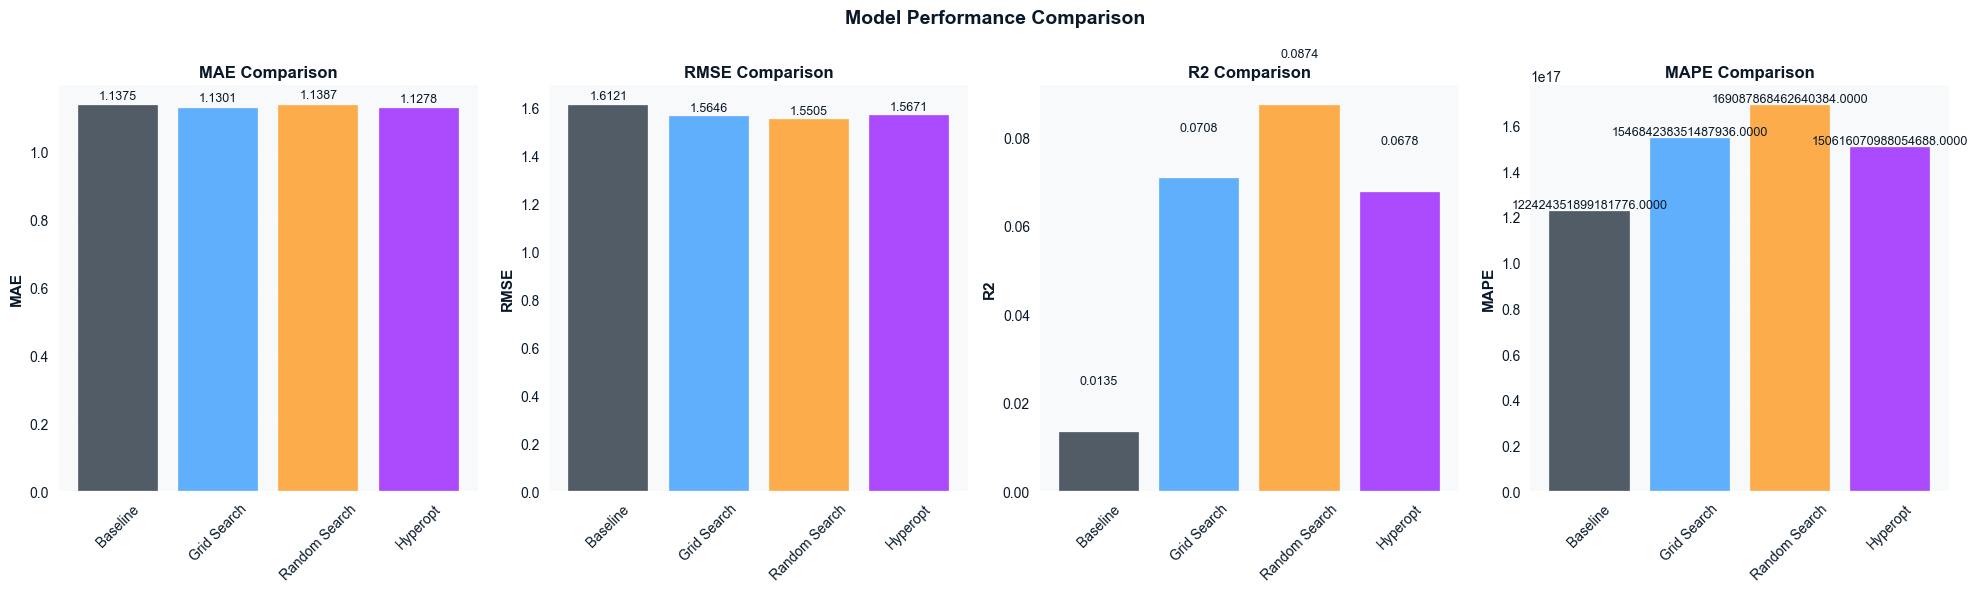

📊 Generating multi-model actual vs predicted...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/08_multi_model_actual_vs_predicted.png


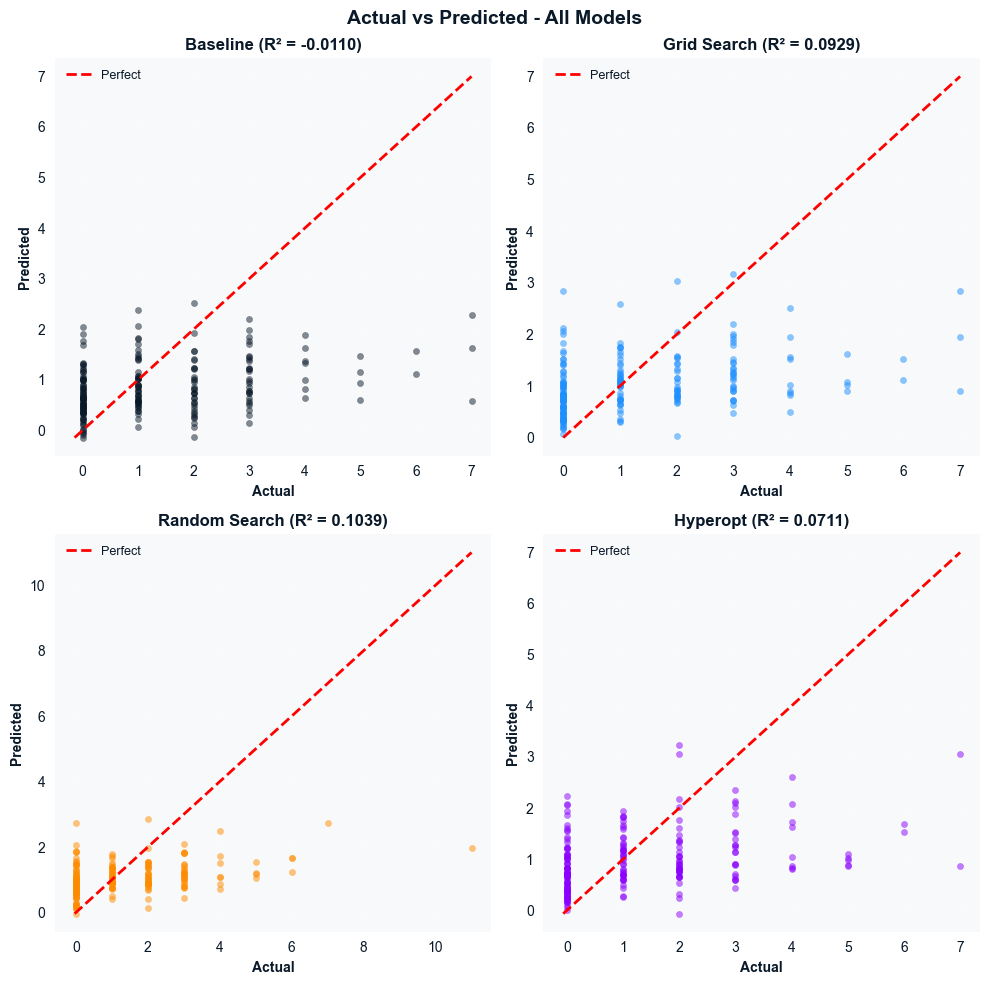

📊 Generating multi-model time series comparison...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/09_multi_model_time_series_comparison.png


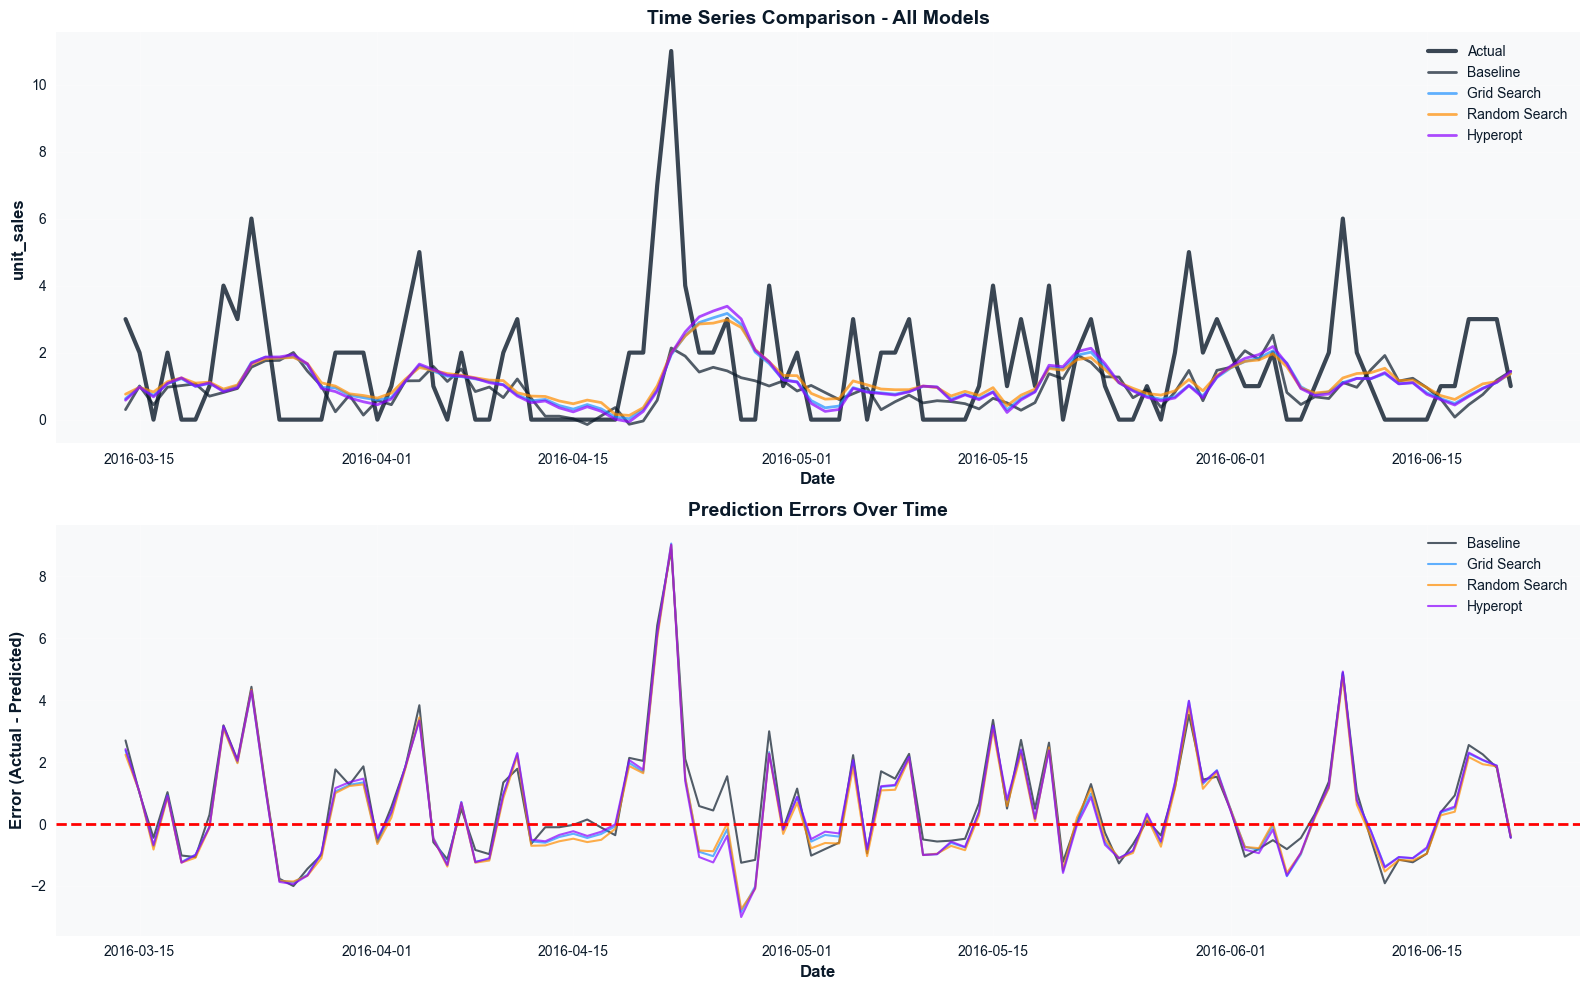

📊 Generating error distribution comparison...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/11_error_distribution_comparison.png


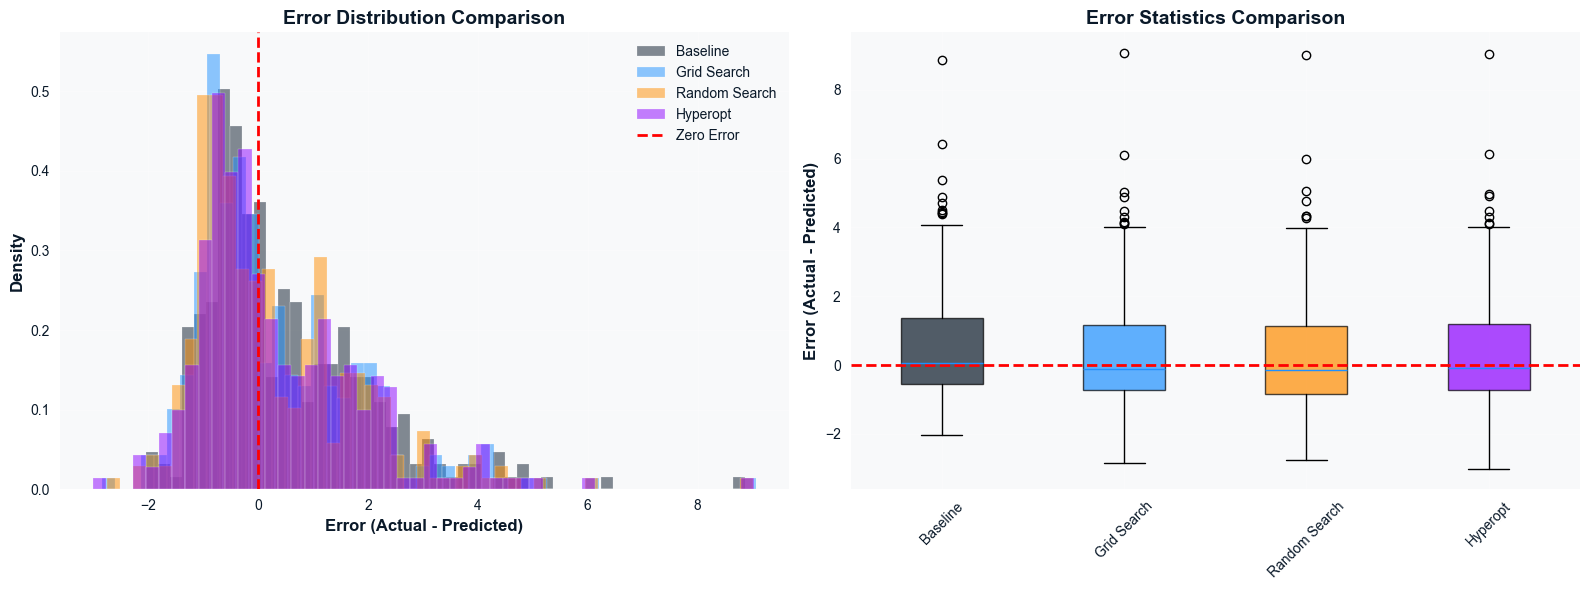

📊 Generating daily overlay subplots...

[DEBUG][plot_all_predictions_overlay_daily] Starting daily overlay subplot plot...
[DEBUG] y_true, dates, and model_predictions validated.
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/14_all_predictions_overlay_daily_subplots.png


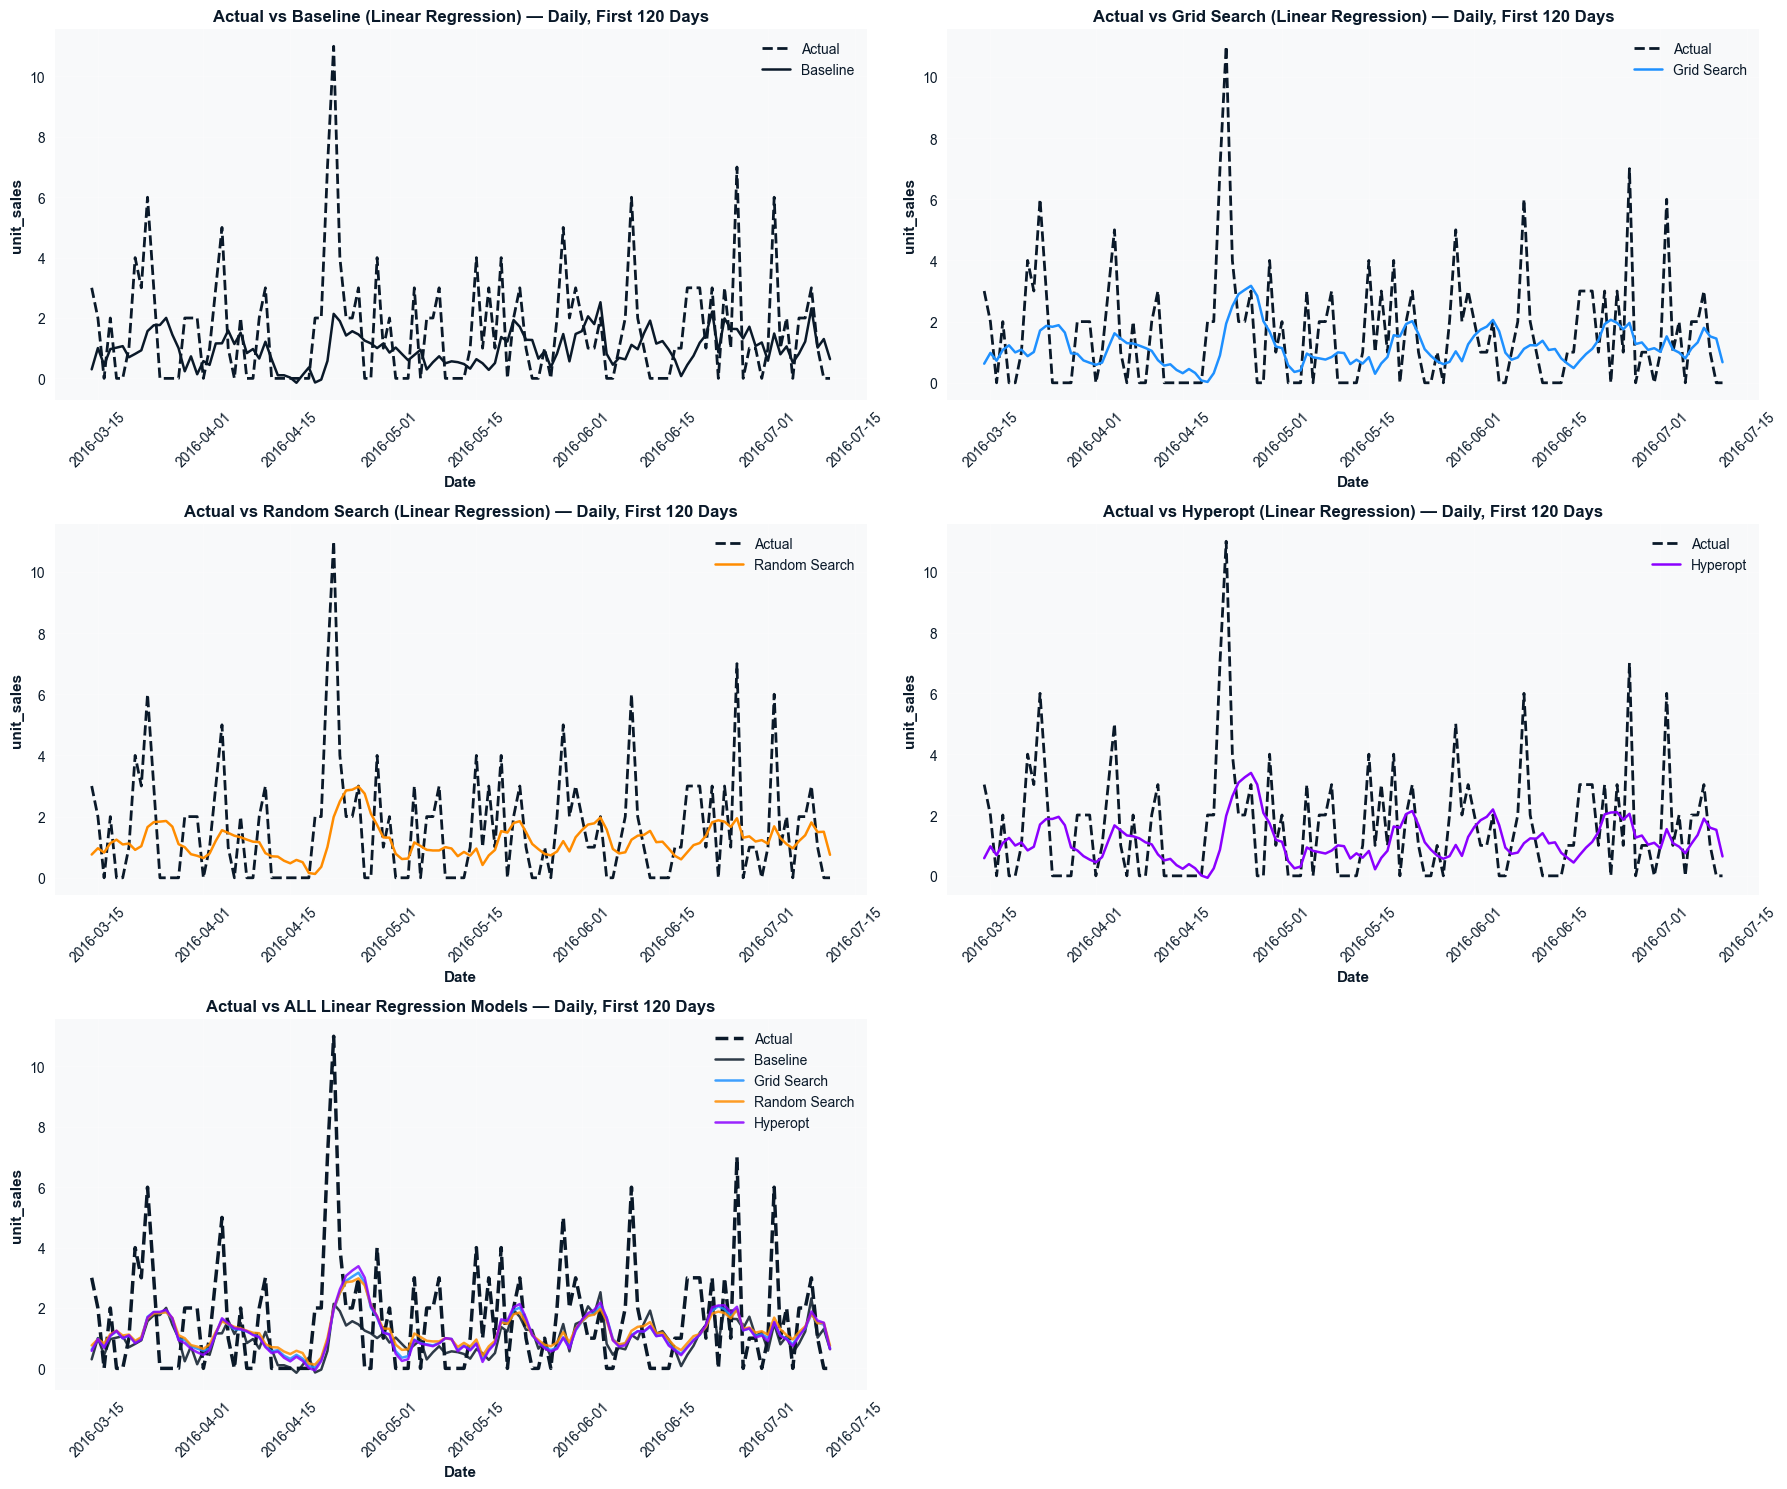

[DEBUG][plot_all_predictions_overlay_daily] Completed.

📊 Generating monthly overlay...

[DEBUG][plot_all_predictions_overlay_monthly] Starting monthly overlay plot...
[DEBUG] y_true, dates, and model_predictions validated.
[DEBUG] y_true length: 292
[DEBUG] Base DataFrame shape: (292, 2)
[DEBUG] Processing model: svr → display name: Baseline
[DEBUG] Converting predictions of svr to pandas Series.
[DEBUG] Aligning lengths → min_len = 292
[DEBUG] Added column 'Baseline' to DataFrame.
[DEBUG] Processing model: svr_grid → display name: Grid Search
[DEBUG] Converting predictions of svr_grid to pandas Series.
[DEBUG] Aligning lengths → min_len = 292
[DEBUG] Added column 'Grid Search' to DataFrame.
[DEBUG] Processing model: svr_random → display name: Random Search
[DEBUG] Converting predictions of svr_random to pandas Series.
[DEBUG] Aligning lengths → min_len = 292
[DEBUG] Added column 'Random Search' to DataFrame.
[DEBUG] Processing model: svr_hyperopt → display name: Hyperopt
[DEBUG] Conv

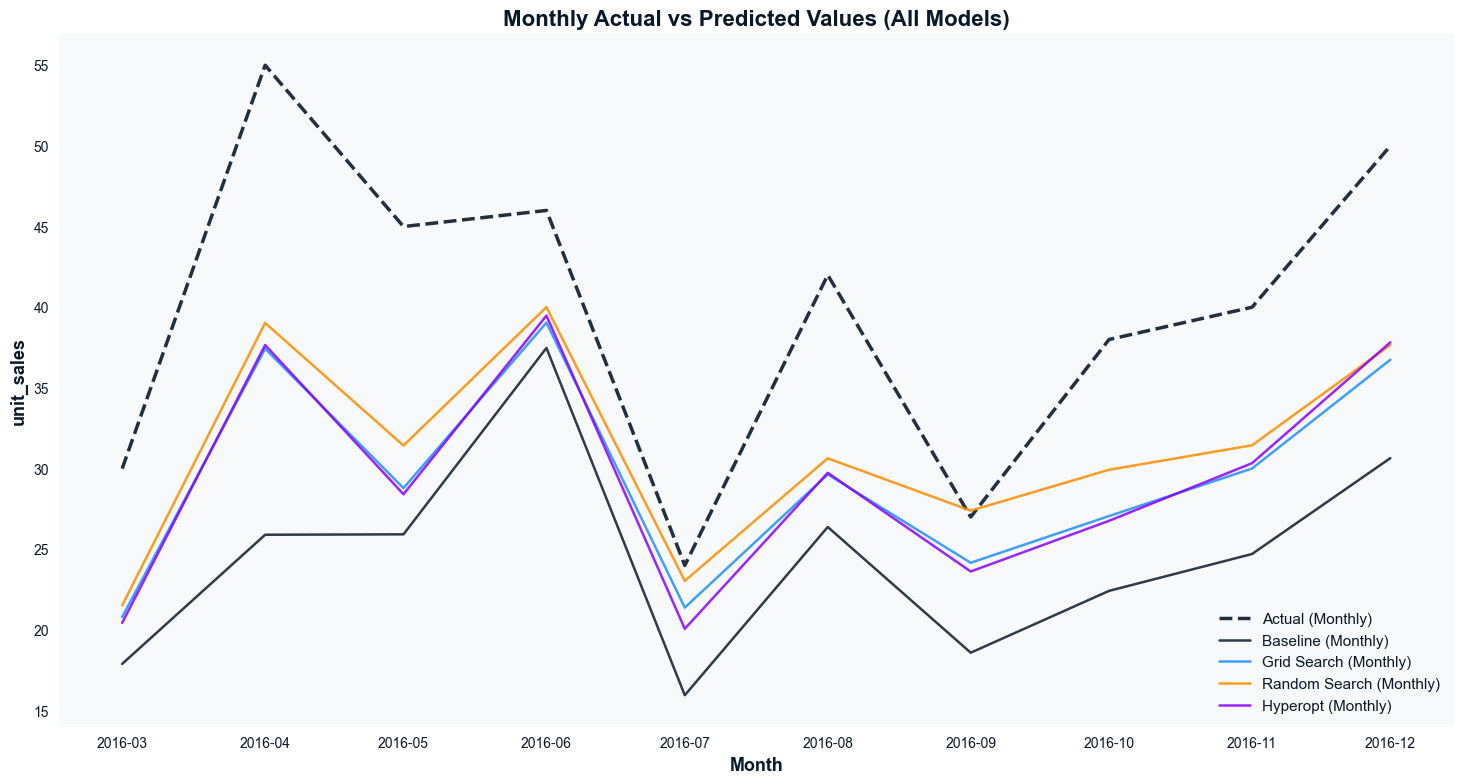

[DEBUG][plot_all_predictions_overlay_monthly] Completed.

📊 Generating model performance radar...
📁 Saved plot: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/visualizations/week_3/svr/10_model_performance_radar.png


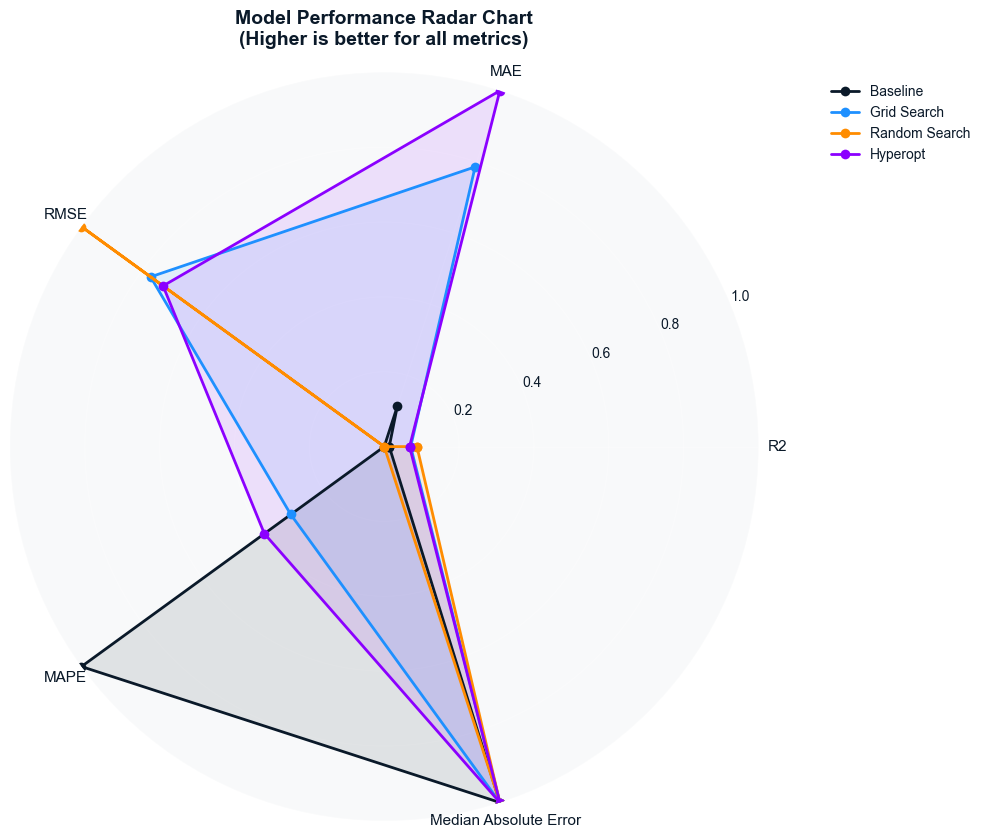


✅ SVR comparison plots generation complete!

✅ All visualizations generated!


In [19]:
runner.generate_visualizations(
    include_eda=False,
    include_model=False,
    include_comparison=True
)


In [21]:
ranking_metrics=runner.compare_models()


📊 Comparing Support Vector Regression with other models...
💾 Comparison results saved to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_2/comparison/svr_comparison.json
✅ Comparison complete! (4 models compared)

Top 5 Models:
       model     rmse      mae       r2 model_type  variant
  svr_random 1.550545 1.138714 0.087384        svr   random
    svr_grid 1.564604 1.130106 0.070760        svr     grid
svr_hyperopt 1.567135 1.127761 0.067751        svr hyperopt
svr_baseline 1.612109 1.137472 0.013475        svr baseline


## 8️⃣ Forecast Future Values

The unified pipeline supports forecasting with:

- configurable horizon  
- daily/weekly/monthly frequency  
- optional exogenous variables  
- uncertainty intervals  


### *9.1 Generate Forecast with horizon=200 days*

In [27]:
forecast = runner.forecast(
    forecast_horizon=200,
    frequency="D",
    confidence_level=0.95
)

forecast



🔮 Generating forecasts with Support Vector Regression...

🔮 SVR FUTURE FORECASTING

📊 MODEL RANKING BY RMSE
                rmse     mae      r2  rank
svr_random    1.5505  1.1387  0.0874     1
svr_grid      1.5646  1.1301  0.0708     2
svr_hyperopt  1.5671  1.1278  0.0678     3
svr           1.6121  1.1375  0.0135     4

--------------------------------------------------------------------------------
🏆 BEST MODEL: svr_random
   → RMSE: 1.5505
   → Full metrics: {'rmse': 1.5505, 'mae': 1.1387, 'r2': 0.0874}

📊 Using best model: svr_random
📅 Preparing future features for 200 periods...
✅ Future features prepared: (200, 14)
📈 Generating point forecasts...
📊 Estimating uncertainty...
💾 Forecast saved to CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_3/svr/svr_random_forecast_200periods.csv
💾 Forecast metadata saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/r

{'point_forecasts': array([1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.20292921, 1.20292921, 1.20292921, 1.20292921,
        1.20292921, 1.2029292

### *9.2 Visualizer Forecast*


📈 Generating forecast plots for Support Vector Regression...
   📊 Plotting forecast components...

📊 GENERATING COMPREHENSIVE FORECAST REPORT

🔮 SVR FUTURE FORECASTING

📊 MODEL RANKING BY RMSE
                rmse     mae      r2  rank
svr_random    1.5505  1.1387  0.0874     1
svr_grid      1.5646  1.1301  0.0708     2
svr_hyperopt  1.5671  1.1278  0.0678     3
svr           1.6121  1.1375  0.0135     4

--------------------------------------------------------------------------------
🏆 BEST MODEL: svr_random
   → RMSE: 1.5505
   → Full metrics: {'rmse': 1.5505, 'mae': 1.1387, 'r2': 0.0874}

📊 Using best model: svr_random
📅 Preparing future features for 30 periods...
✅ Future features prepared: (30, 14)
📈 Generating point forecasts...
📊 Estimating uncertainty...
💾 Forecast saved to CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_3/svr/svr_random_forecast_30periods.csv
💾 Forecast metadata saved: /Users/guykaptue

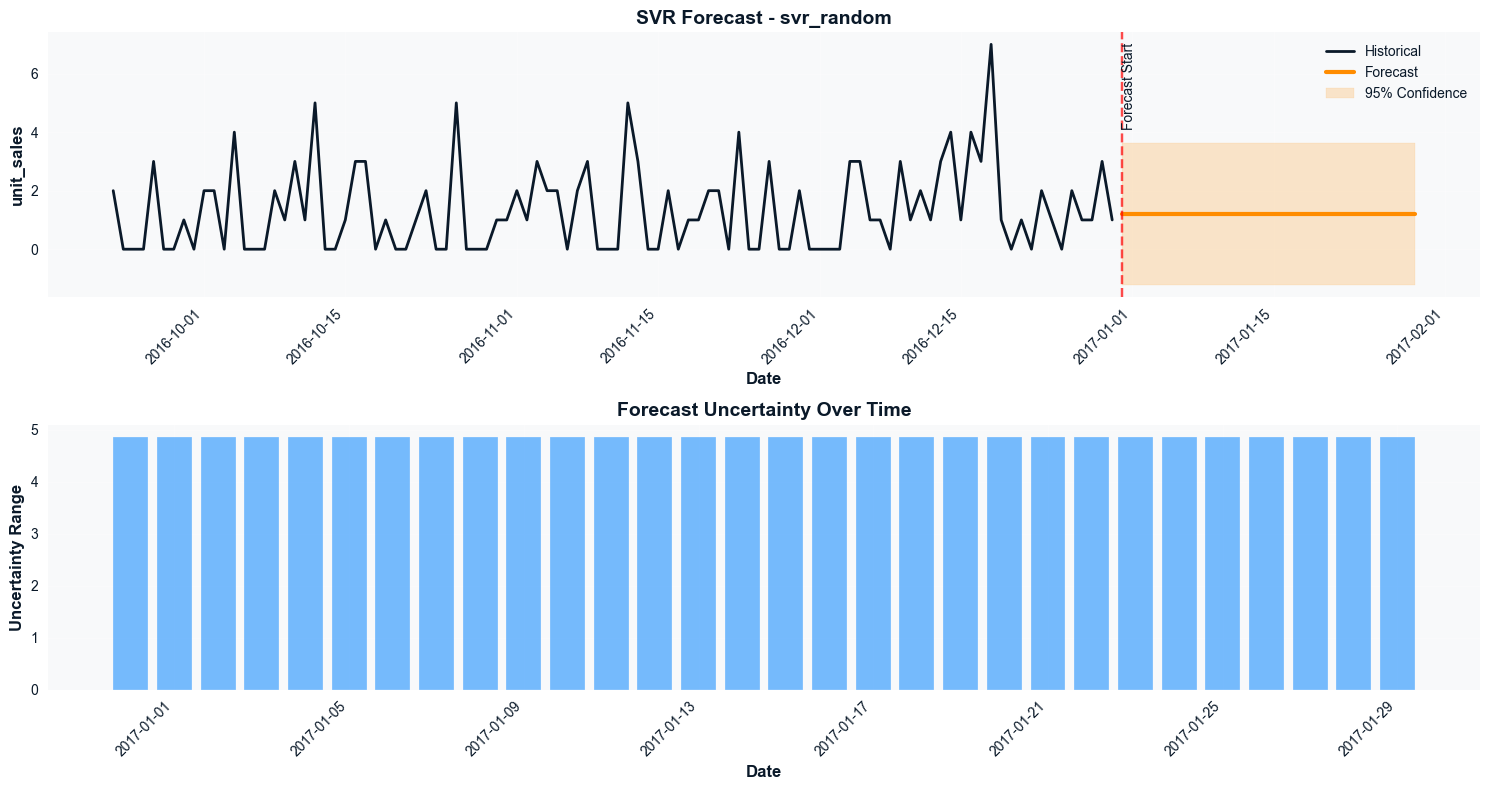

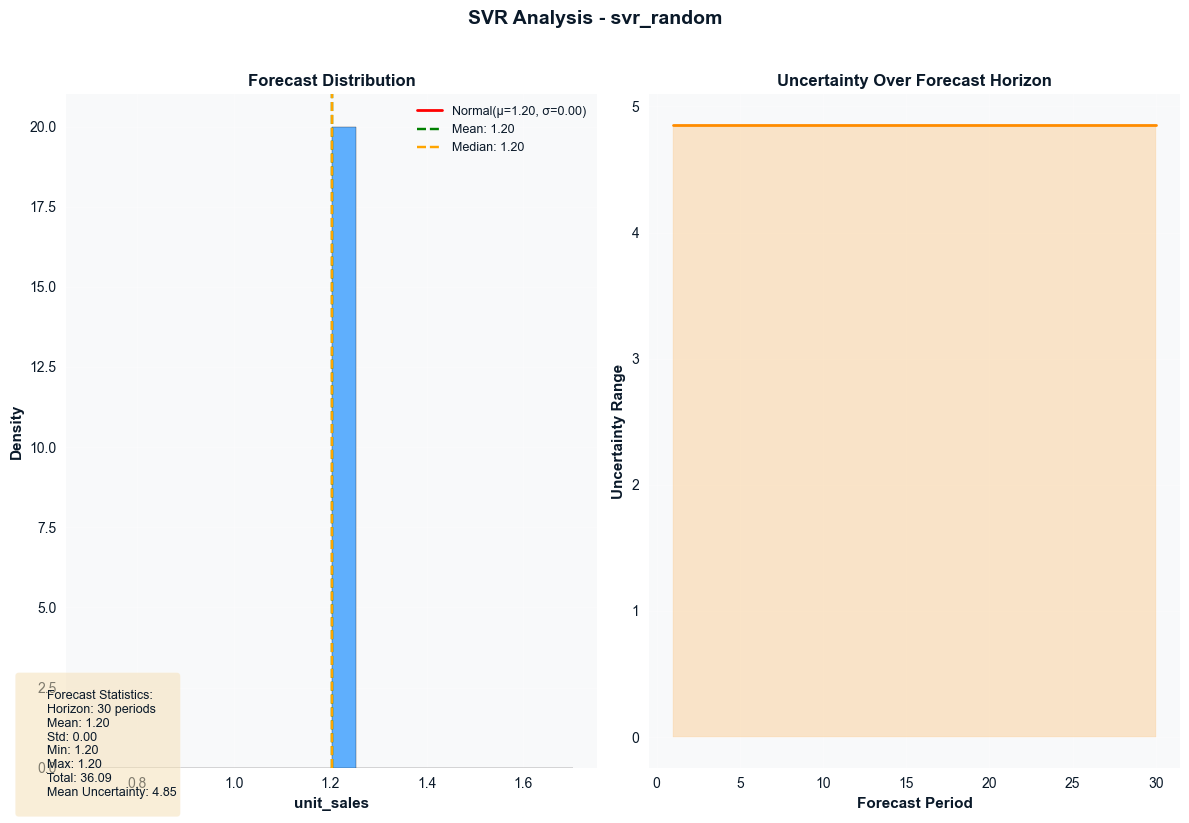

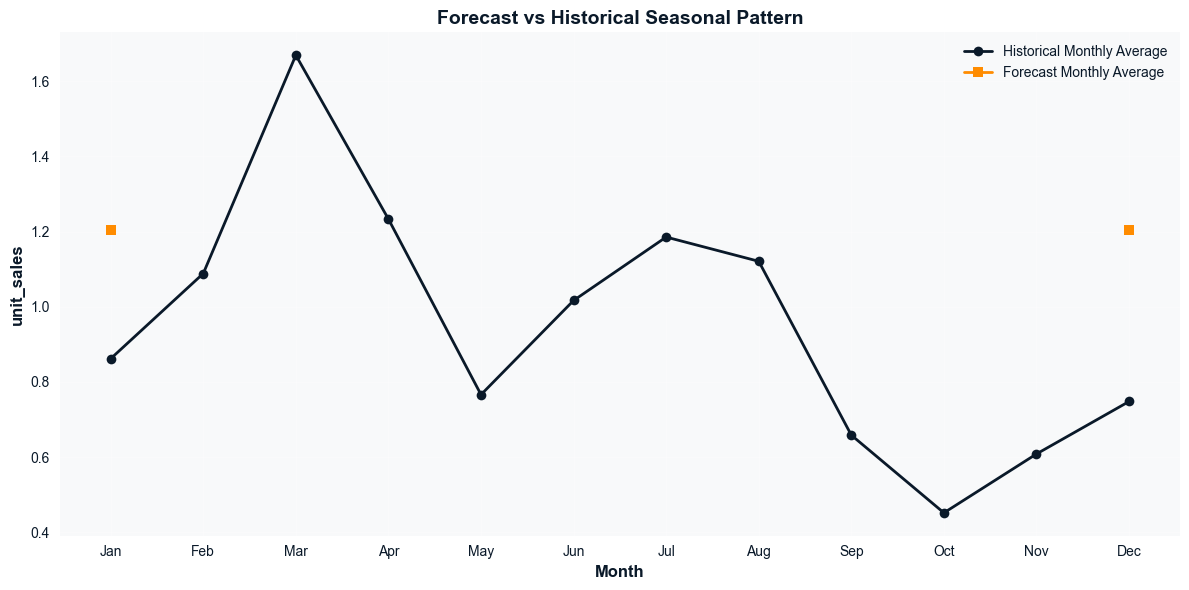

   📋 Creating forecast summary...

FORECAST SUMMARY TABLE
Model Variant                 : svr_random
Forecast Horizon              : 30 periods
Frequency                     : D
Confidence Level              : 95.0%
Mean Forecast                 : 1.20
Median Forecast               : 1.20
Std Forecast                  : 0.00
Min Forecast                  : 1.20
Max Forecast                  : 1.20
Total Forecast                : 36.09
Mean Uncertainty              : 4.85
Uncertainty Ratio             : 4.034

First 10 Forecast Values:
----------------------------------------
Date            Point Forecast  Lower Bound     Upper Bound    
----------------------------------------
2016-12-31                 1.20           -1.22            3.63
2017-01-01                 1.20           -1.22            3.63
2017-01-02                 1.20           -1.22            3.63
2017-01-03                 1.20           -1.22            3.63
2017-01-04                 1.20           -1.22          

In [30]:
forecast_200 = runner.generate_forecast_plots(
    forecast_horizon= 200,
    frequency = "D",
)

## SVR Pipeline Summarize

In [31]:
runner.summarize()


📊 SUPPORT VECTOR REGRESSION - COMPREHENSIVE SUMMARY

📋 CONFIGURATION
--------------------------------------------------
week                : 3
filename            : final_train_dataset.csv
max_date            : 2016-12-31
load_mode           : csv_filter
filter_folder       : filtered
folder_name         : features
store_ids           : [24]
item_ids            : [105577]
verbose             : True

📊 DATA INFORMATION
--------------------------------------------------
train_samples       : 1167
test_samples        : 292
features            : 14
target              : unit_sales

🤖 TRAINING STATUS
--------------------------------------------------
Trained Variants (4):
  • svr
  • svr_grid
  • svr_hyperopt
  • svr_random

📈 RESULTS SUMMARY
--------------------------------------------------
Top Performing Models:
  • svr_random                     | RMSE: 1.551 | R²: 0.087
  • svr_grid                       | RMSE: 1.565 | R²: 0.071
  • svr_hyperopt                   | RMSE: 1.567 | R²: